In [19]:
import resources
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import seaborn as sns
from pathlib import Path
%matplotlib inline

mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "serif",
    # "font.serif": ["Computer Modern Roman"],
    "font.size": 15,
})

In [2]:
def nc4radiusOutput(df):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=500)
    ax.plot(df.index, df['NC4 Radius'], label='NC4 Radius')
    ax.set_xlabel('Cut No')
    ax.set_ylabel('NC4 Radius (mm)')

In [3]:
def probeVisualise(df, doc=0.03, tol=0.02):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, dpi=500)

    y_measured = df['AVGPROBE'].values - df['AVGPROBE'].iloc[0]
    l1 = ax[0].plot(y_measured, label='Measured DOC',)

    x = np.arange(0, len(df))
    y_ideal = x * doc
    l2 = ax[0].plot(x, y_ideal, 'C0', linestyle='--', alpha=0.5, label='Ideal DOC')

    y_tol = (y_ideal + tol, y_ideal - tol)
    ax[0].fill_between(x, y_tol[0], y_tol[1], color='C0', alpha=0.4, label='Tolerance')

    ax[0].set_ylim(0,)
    ax[0].set_xlim(0,)
    ax[0].grid()

    ax2 = ax[0].twinx()
    l3 = ax2.plot(y_ideal - y_measured, label='Error', color='C1')

    ax[0].set_ylabel('Radial DOC (mm)')
    ax2.set_ylabel('Error (mm)')

    lns = l1 + l2 + l3
    labs = [l.get_label() for l in lns]
    ax[0].legend(lns, labs, loc=0)

    ax[1].scatter(df.index, df['PROBEDIFF'], label='Probe Diff', s=10)
    ax[1].axhline(y=doc, color = 'r', alpha=0.5)
    for t_lim in (doc-tol, doc+tol): ax[1].axhline(y=t_lim, color='r', alpha=0.5, ls='--')
    ax[1].set_xlabel('Cut No')
    ax[1].set_ylabel('Measured Radial DOC (mm)')
    ax[1].grid()
    return fig, ax 

In [4]:
def refbore_probe(df):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=500)
    ax[0].scatter(df.index, df['REFBORE-S'], label='REFBORE-S', s=10)
    ax[0].set_xlabel('Cut No')
    ax[0].set_ylabel('Reference Bore Diameter (mm)')

    sc = ax[1].scatter(df['REFBORE-X'], df['REFBORE-Y'], marker='x', s=100, c=np.arange(len(df)))
    fig.colorbar(sc, ax=ax[1], label='Cut No')
    ax[1].set_xlabel('Relative Bore X Position (um)')
    ax[1].set_ylabel('Relative Bore Y Position (um)')

    fig, ax = plt.subplots(1, 3, figsize=(12, 4), layout='tight')
    ax[0].boxplot(df['REFBORE-X'], labels=['REFBORE-X'])
    ax[1].boxplot(df['REFBORE-Y'], labels=['REFBORE-Y'])
    ax[2].boxplot(df['REFBORE-S'], labels=['REFBORE-S'])

    ax[0].set_ylabel('Relative Bore X Position (um)')
    ax[1].set_ylabel('Relative Bore Y Position (um)')
    ax[2].set_ylabel('Bore Diameter (mm)')
    return df[['REFBORE-S', 'REFBORE-X', 'REFBORE-Y']].describe()

## Test 9

In [5]:
filepath = os.path.abspath(r"../../Testing/22_11_30_weartest_1000/221130-DCBTEST.csv")
filepath

'c:\\Users\\tomje\\OneDrive - Cardiff University\\Documents\\PHD\\AE\\Testing\\22_11_30_weartest_1000\\221130-DCBTEST.csv'

In [6]:
probe_data = pd.read_csv(filepath, header=3, index_col='Cut No')
probe_data.drop(probe_data.index[159:], inplace=True)
probe_data

NC4 Radius       P1       P2       P3       P4      AVG      DIFF
Cut No                                                                   
0           0.6694  19.3023  19.2852  19.3086  19.3323  19.3071       NaN
1           0.6636  19.4402  19.4294  19.4428  19.4191  19.4329  0.125775
2           0.6633  19.4820  19.4715  19.4800  19.4761  19.4774  0.044525
3           0.6625  19.5035  19.4887  19.5139  19.4997  19.5015  0.024050
4           0.6625  19.5383  19.5140  19.5222  19.5215  19.5240  0.022550
...            ...      ...      ...      ...      ...      ...       ...
154         0.6415  24.0338  24.0030  24.0406  24.0408  24.0296  0.028100
155         0.6280  24.0671  24.0641  24.0754  24.0657  24.0681  0.038525
156         0.5928  24.1059  24.1120  24.1147  24.0692  24.1005  0.032375
157         0.5569  24.1331  24.1628  24.1700  24.1565  24.1556  0.055150
158         0.5220  24.2253  24.2239  24.2277  24.2374  24.2286  0.072975

[159 rows x 7 columns]

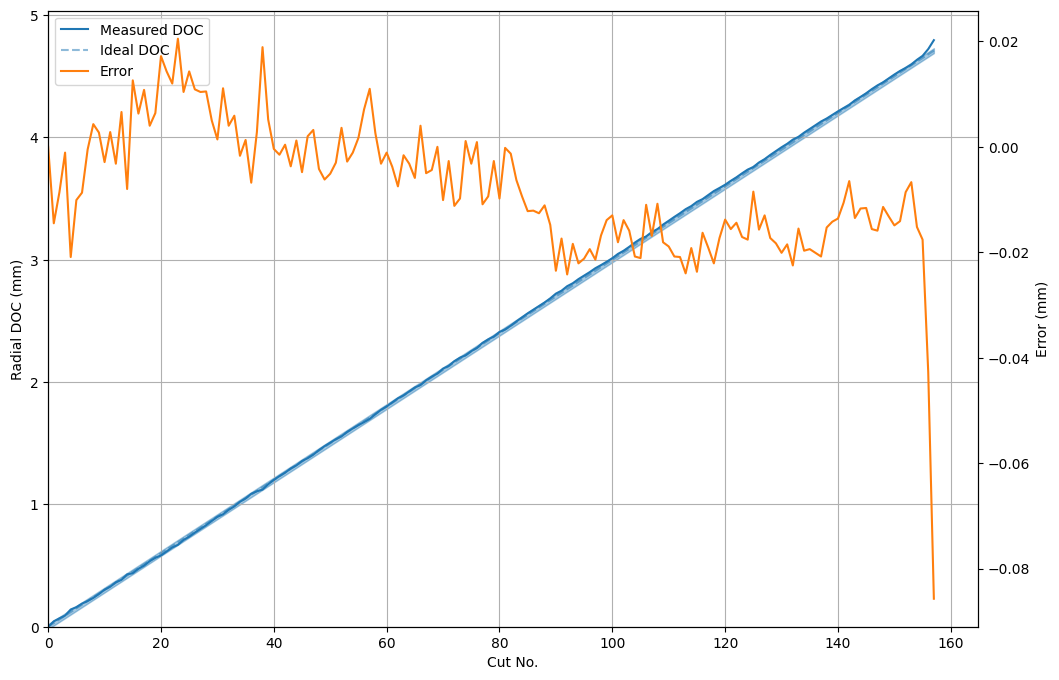

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharex=True)

y_measured = probe_data['AVG'][1:].values
y_measured = y_measured - y_measured[0]
l1 = ax.plot(y_measured, label='Measured DOC',)
# theorectical DOC wihtout wear
doc = 0.03
x = np.arange(0, len(probe_data)-1)
y_ideal = x * doc
l2 = ax.plot(x, y_ideal, 'C0', linestyle='--', alpha=0.5, label='Ideal DOC')

# show tolerance
tol = 0.02
y_tol = (y_ideal + tol, y_ideal - tol)

ax.fill_between(x, y_tol[0], y_tol[1], color='C0', alpha=0.4, label='Tolerance')

ax.set_ylim(0,)
ax.set_xlim(0,)
ax.grid()

# Error plot
ax2 = ax.twinx()
l3 = ax2.plot(y_ideal - y_measured, label='Error', color='C1')
# ax2.set_ylim(-0.05, )

ax.set_ylabel('Radial DOC (mm)')
ax2.set_ylabel('Error (mm)')
ax.set_xlabel('Cut No.')

lns = l1 + l2 + l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

count    158.000000
mean       0.031149
std        0.010478
min        0.009375
25%        0.025881
50%        0.030425
75%        0.034244
max        0.125775
Name: DIFF, dtype: float64

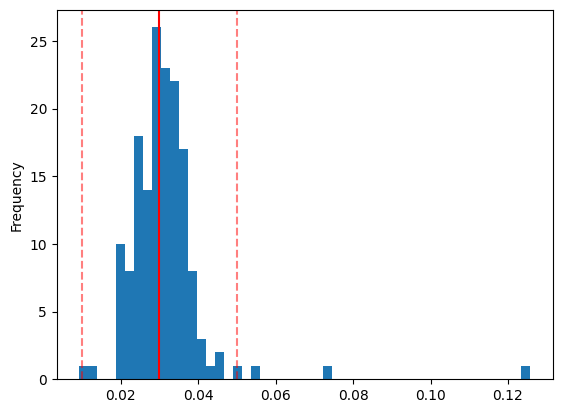

In [8]:
diff = probe_data.loc[:,'DIFF']
diff = diff.dropna()
ax = diff.plot.hist(bins= 50)

doc = 0.03
tol = 0.02
t_lims = [(doc-tol), (doc+tol)]
ax.axvline(x=doc, color = 'r')
for t_lim in t_lims: ax.axvline(x=t_lim, color='r', alpha=0.5, ls='--')
diff.describe()

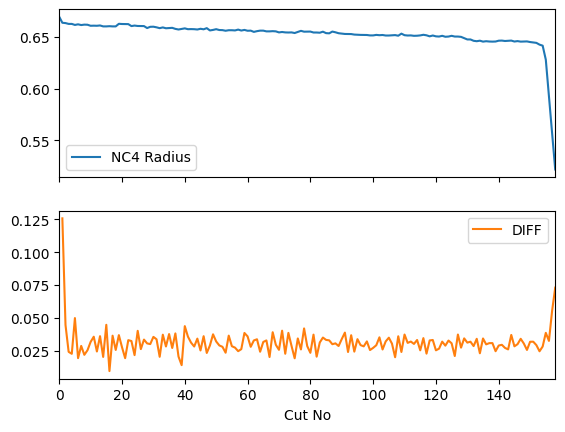

In [9]:
ax = probe_data.plot(y=['NC4 Radius', 'DIFF'],subplots=True, sharex=True, xlim=[0,158])

In [10]:
exp9 = resources.load('Test 9')
exp9

Test No: 9
Date: 2022-11-30
Data: ../../Testing/22_11_30_weartest_1000
No. Files: AE-158 NC4-159

In [11]:
feat_df = exp9.features
feat_df['Probe diff'] = probe_data['DIFF']
feat_df.head()

RMS  Kurtosis  Amplitude  Skewness  Freq 10 kHz  Freq 35 kHz  \
0  1.891464  3.994031  13.023259 -0.011871    56.316368    68.038985   
1  1.347911  5.450588  10.642370 -0.140114    50.581235    59.484536   
2  1.345826  5.448978  11.530952 -0.007557    49.526375    61.283590   
3  1.282103  6.104584  13.500013  0.010431    49.633509    61.005323   
4  1.285406  6.431533  13.946903  0.013657    49.253891    60.789605   

   Freq 134 kHz  Mean radius  Peak radius  Radius diff    Runout  Form error  \
0     58.461303     0.664968     0.672558    -0.003375  0.013251    0.015911   
1     53.085123     0.664559     0.672041    -0.000409  0.012694    0.015116   
2     51.947808     0.664087     0.671288    -0.000472  0.011380    0.014551   
3     52.037463     0.663362     0.670143    -0.000725  0.010906    0.014653   
4     52.052510     0.663254     0.669938    -0.000109  0.011009    0.014645   

   Probe diff  
0         NaN  
1    0.125775  
2    0.044525  
3    0.024050  
4    0.022550

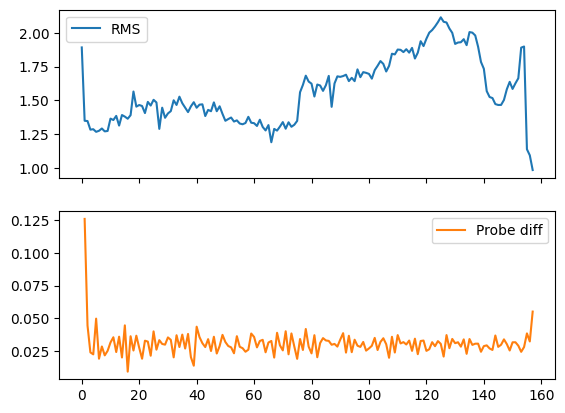

In [12]:
ax = feat_df.plot(y=['RMS', 'Probe diff'], subplots=True, sharex=True)

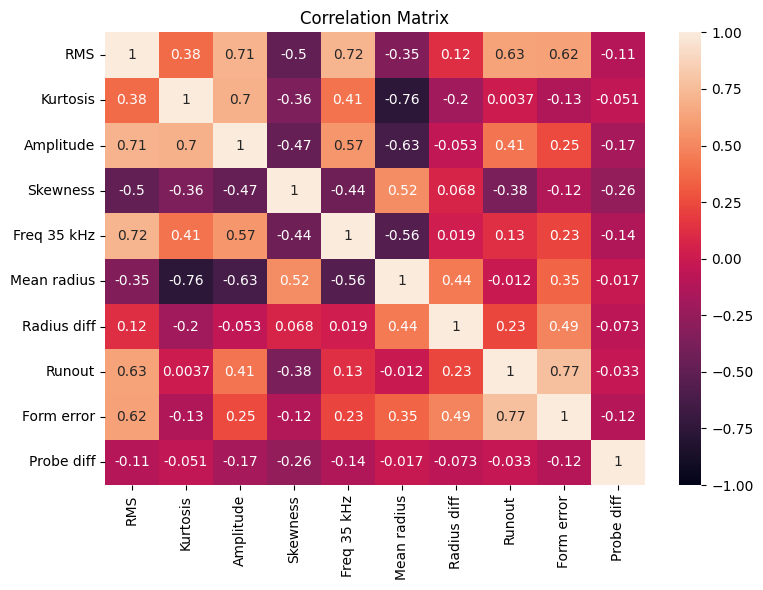

In [13]:
def corr_matrix(df: pd.DataFrame):
    cols = df.columns
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    sns.heatmap(df.corr(),
                ax=ax,
                annot=True,
                xticklabels=cols,
                yticklabels=cols,
                vmin=-1,
                vmax=1) \
        .set(title='Correlation Matrix')
    plt.tight_layout()
    plt.show()
    return df.corr()

corr_df = corr_matrix(feat_df.drop(columns=['Peak radius','Freq 10 kHz', 'Freq 134 kHz']))

## Test 11

In [14]:
filepath = Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_05_28_weartest_D1.3#1000\240528_WEARTEST.csv'
print(filepath)
assert filepath.exists()

C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_05_28_weartest_D1.3#1000\240528_WEARTEST.csv


In [15]:
probe_data = pd.read_csv(filepath, header=2)
probe_data['PROBEDIFF'] = probe_data['AVGPROBE'].diff()
probe_data['PROBEDIFF'] = probe_data['PROBEDIFF'].fillna(0)
probe_data['REFBORE-X'] = (probe_data['REFBORE-X'] - probe_data['REFBORE-X'].iloc[0]) * 1000
probe_data['REFBORE-Y'] = (probe_data['REFBORE-Y'] - probe_data['REFBORE-Y'].iloc[0]) * 1000
probe_data.set_index('Cut No', inplace=True)
probe_data['AVGPROBE'] = probe_data['AVGPROBE'] - probe_data['AVGPROBE'].iloc[0]
probe_data.head()

NC4 Radius  PROBE1  PROBE2  PROBE3  PROBE4  AVGPROBE  REFBORE-X  \
Cut No                                                                    
0.0         0.6705  2.1291  2.1289  2.1296  2.1285    0.0000        0.0   
1.0         0.6700  2.1293  2.1290  2.1300  2.1282    0.0002       -4.6   
2.0         0.6684  2.1326  2.1342  2.1363  2.1327    0.0049       -7.9   
3.0         0.6663  2.1651  2.1708  2.1725  2.1673    0.0399      -10.1   
4.0         0.6653  2.2065  2.2072  2.2071  2.2065    0.0778      -10.8   

        REFBORE-Y  REFBORE-S  PROBEDIFF  
Cut No                                   
0.0           0.0    25.0050     0.0000  
1.0           3.7    25.0045     0.0002  
2.0           5.4    25.0043     0.0047  
3.0           5.9    25.0043     0.0350  
4.0           5.6    25.0042     0.0379

In [16]:
# Drop data when no AE was recorded
probe_data.drop(index=[34, 35, 36, 37], inplace=True)
probe_data.reset_index(drop=True, inplace=True)

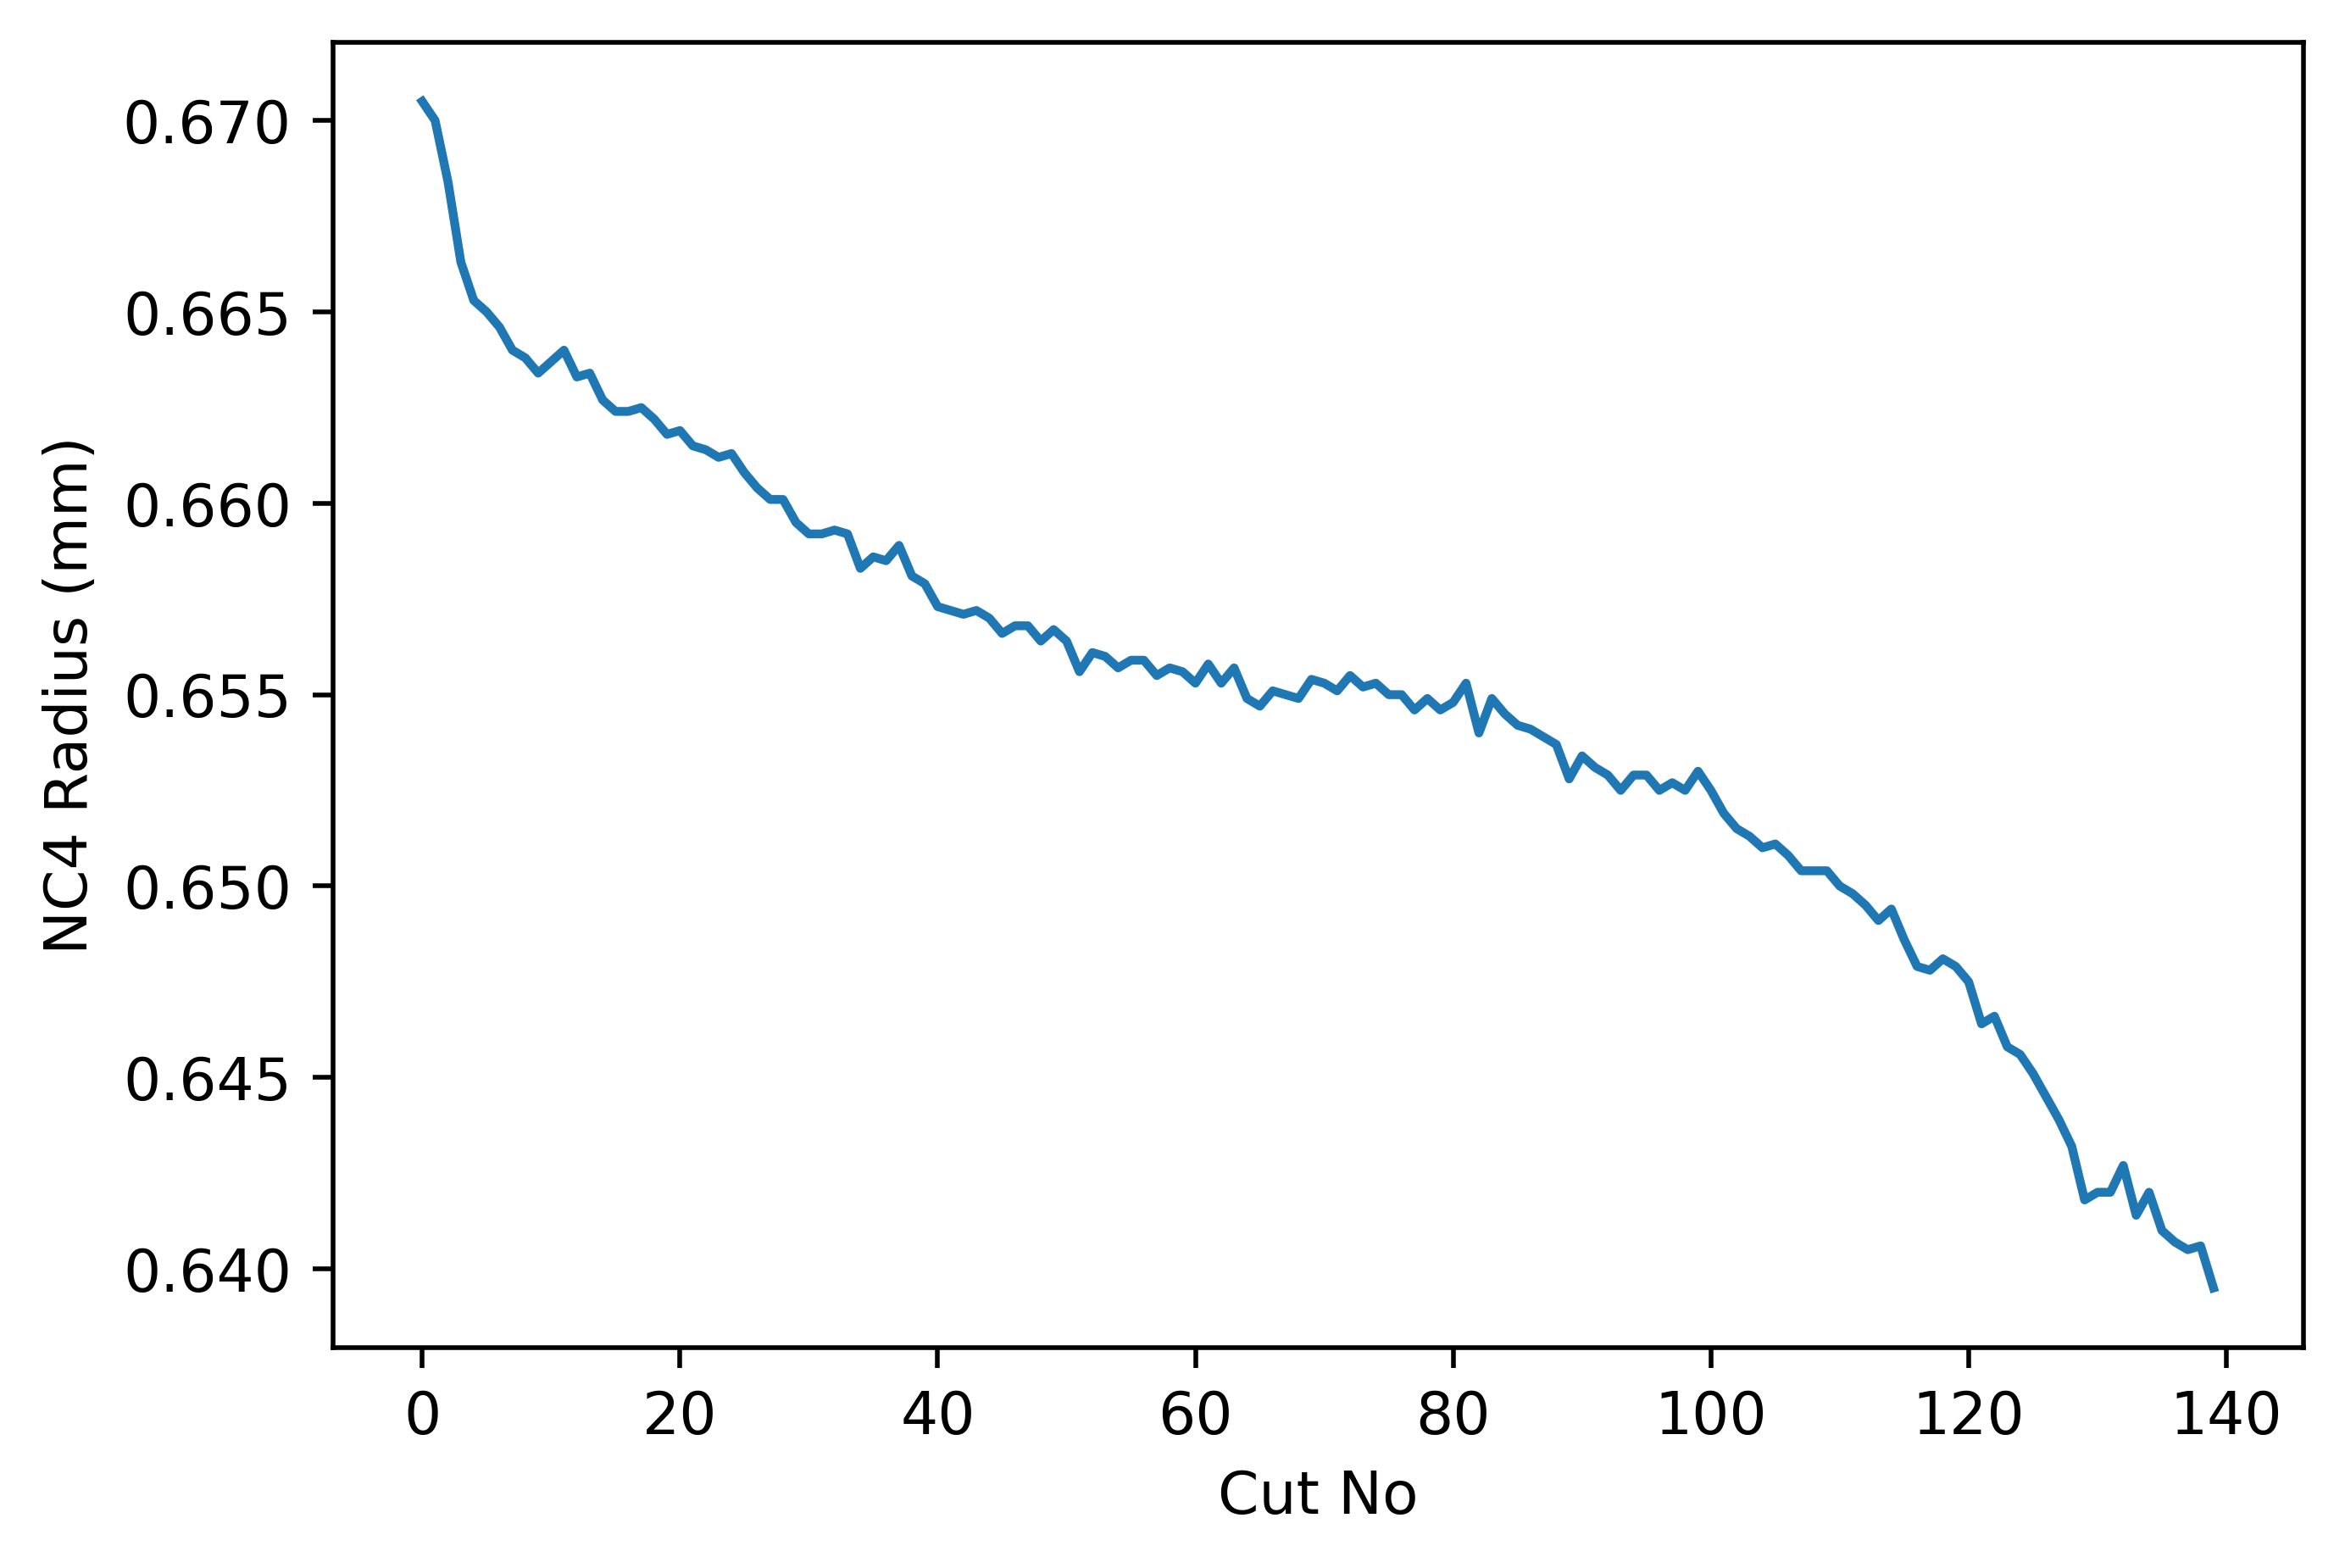

In [17]:
nc4radiusOutput(probe_data)

(<Figure size 6000x4000 with 3 Axes>,
 array([<AxesSubplot: ylabel='Radial DOC (mm)'>,
        <AxesSubplot: xlabel='Cut No', ylabel='Measured Radial DOC (mm)'>],
       dtype=object))

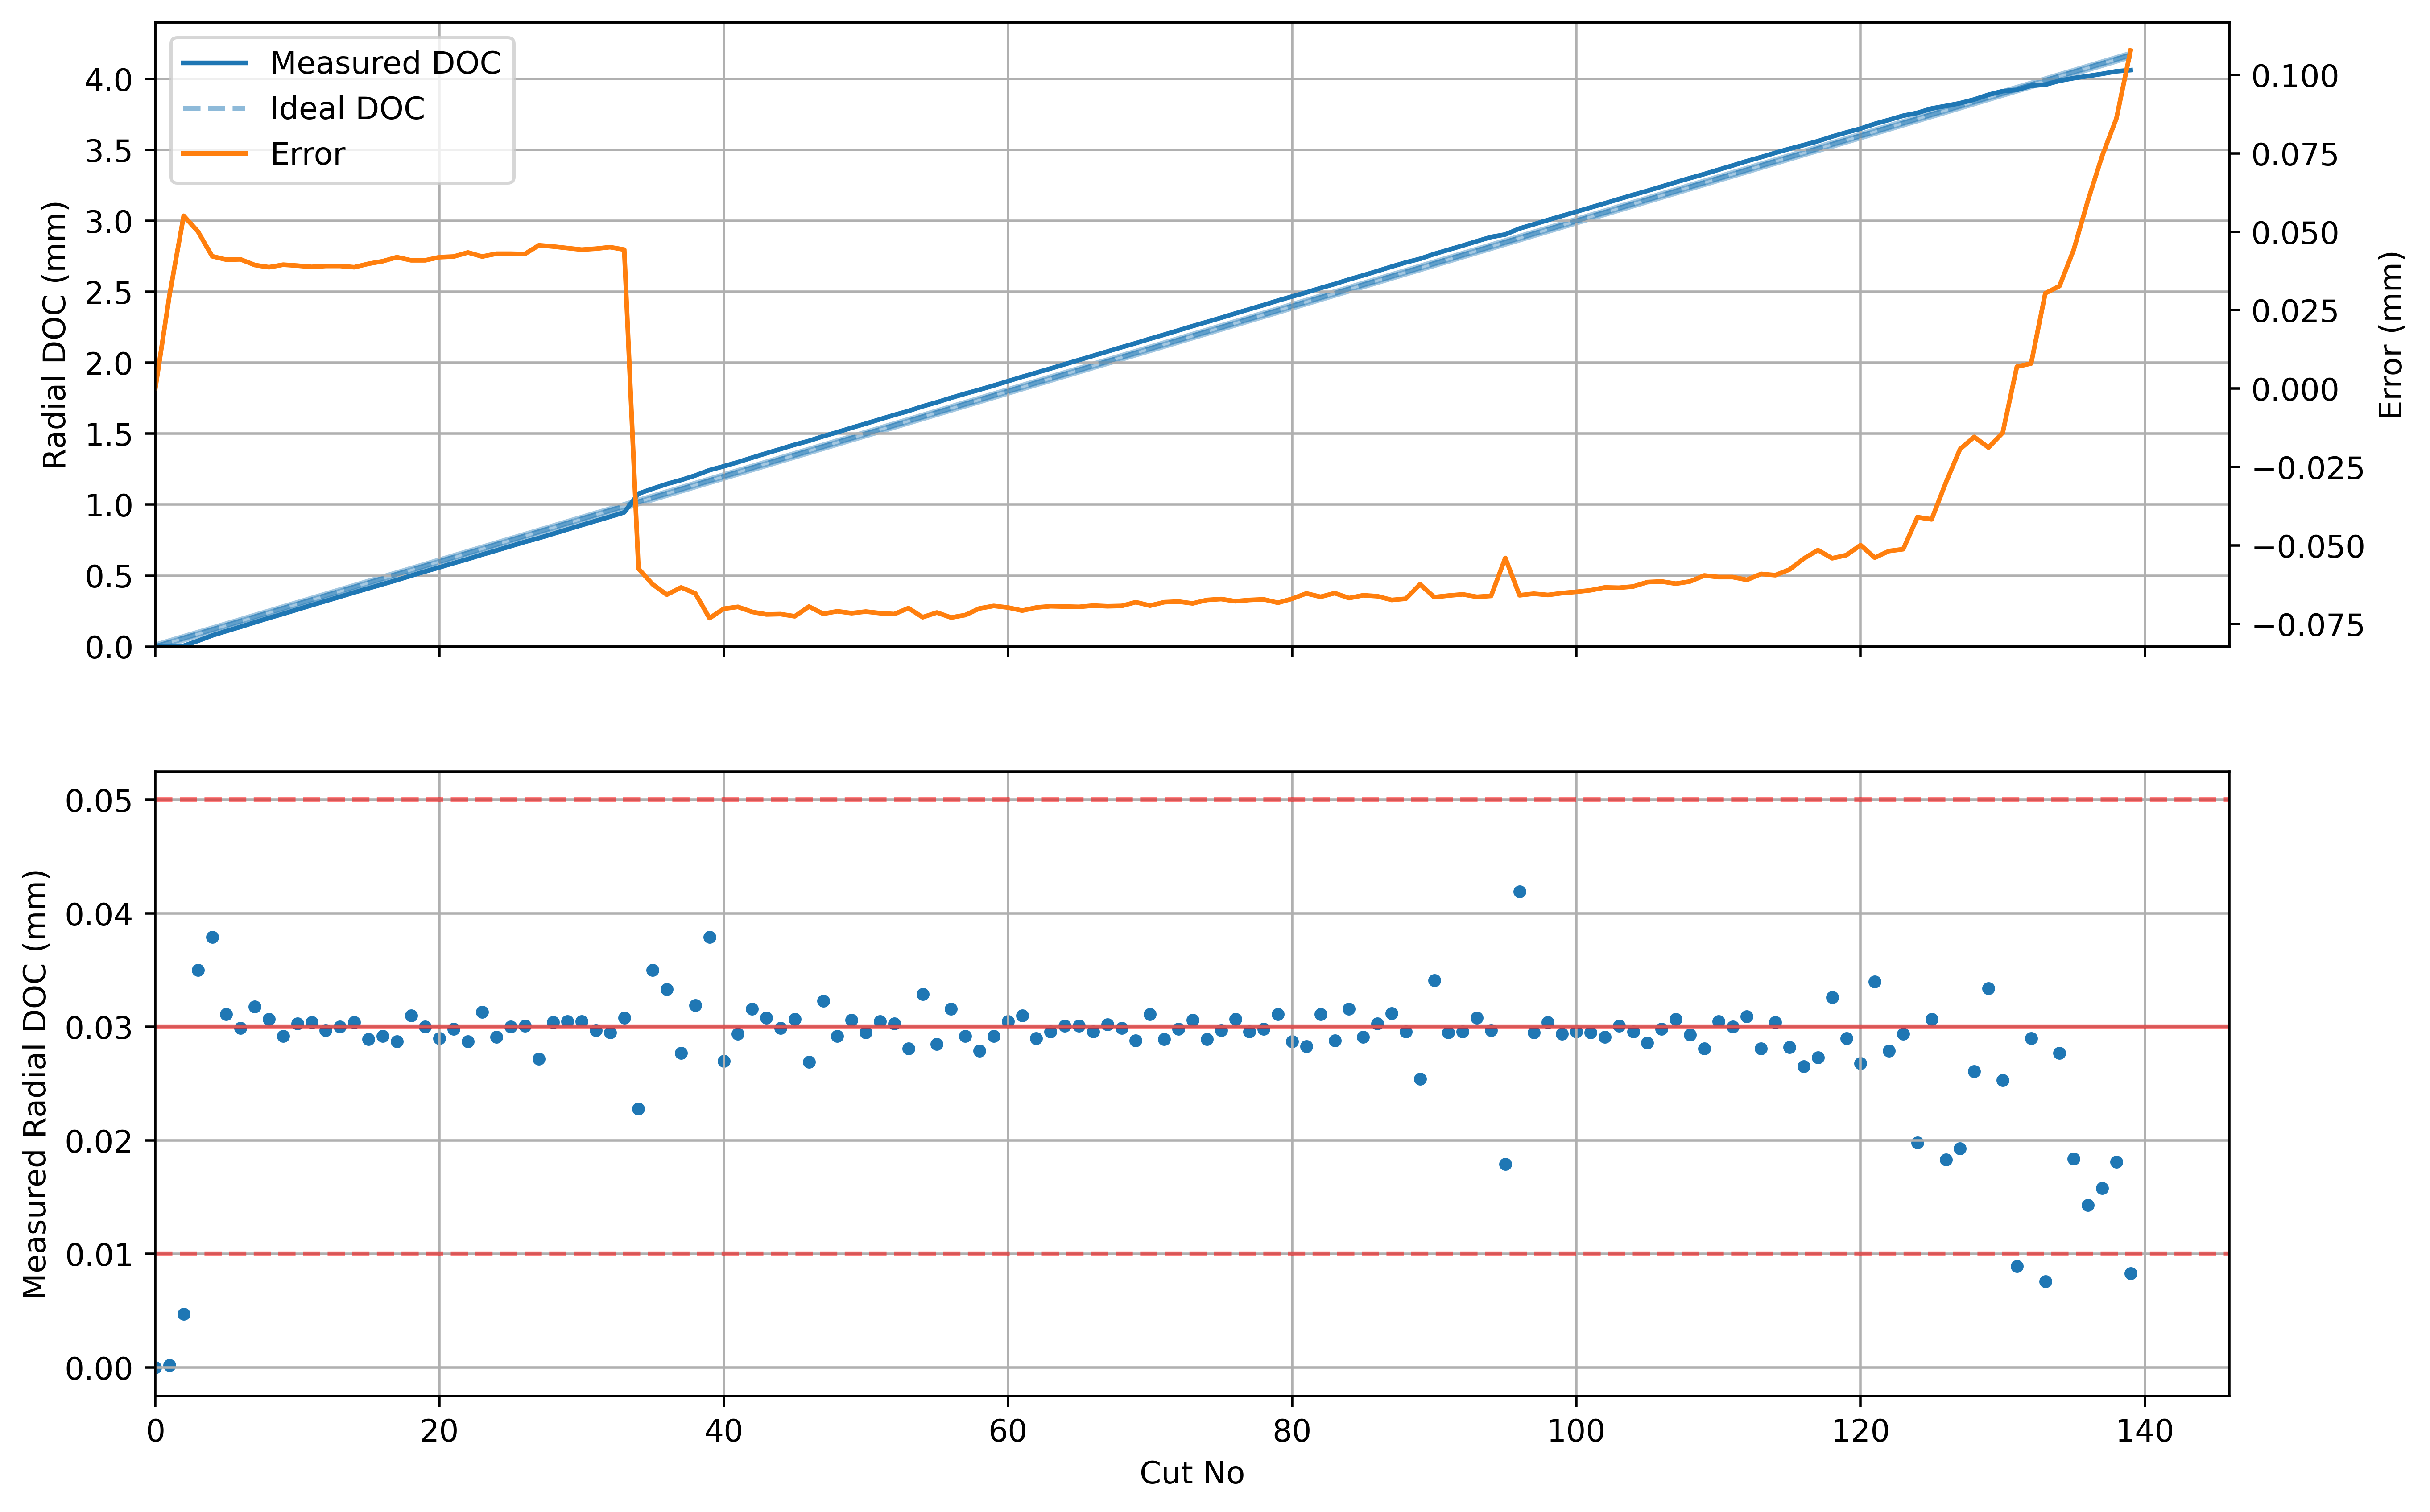

In [18]:
probeVisualise(probe_data)

REFBORE-S   REFBORE-X   REFBORE-Y
count  140.000000  140.000000  140.000000
mean    25.006504  -13.930000    4.740000
std      0.001715    2.675541    1.025699
min     24.998200  -20.600000    0.000000
25%     25.005800  -15.700000    3.975000
50%     25.006900  -14.900000    5.050000
75%     25.007800  -11.875000    5.500000
max     25.008700    0.000000    6.200000

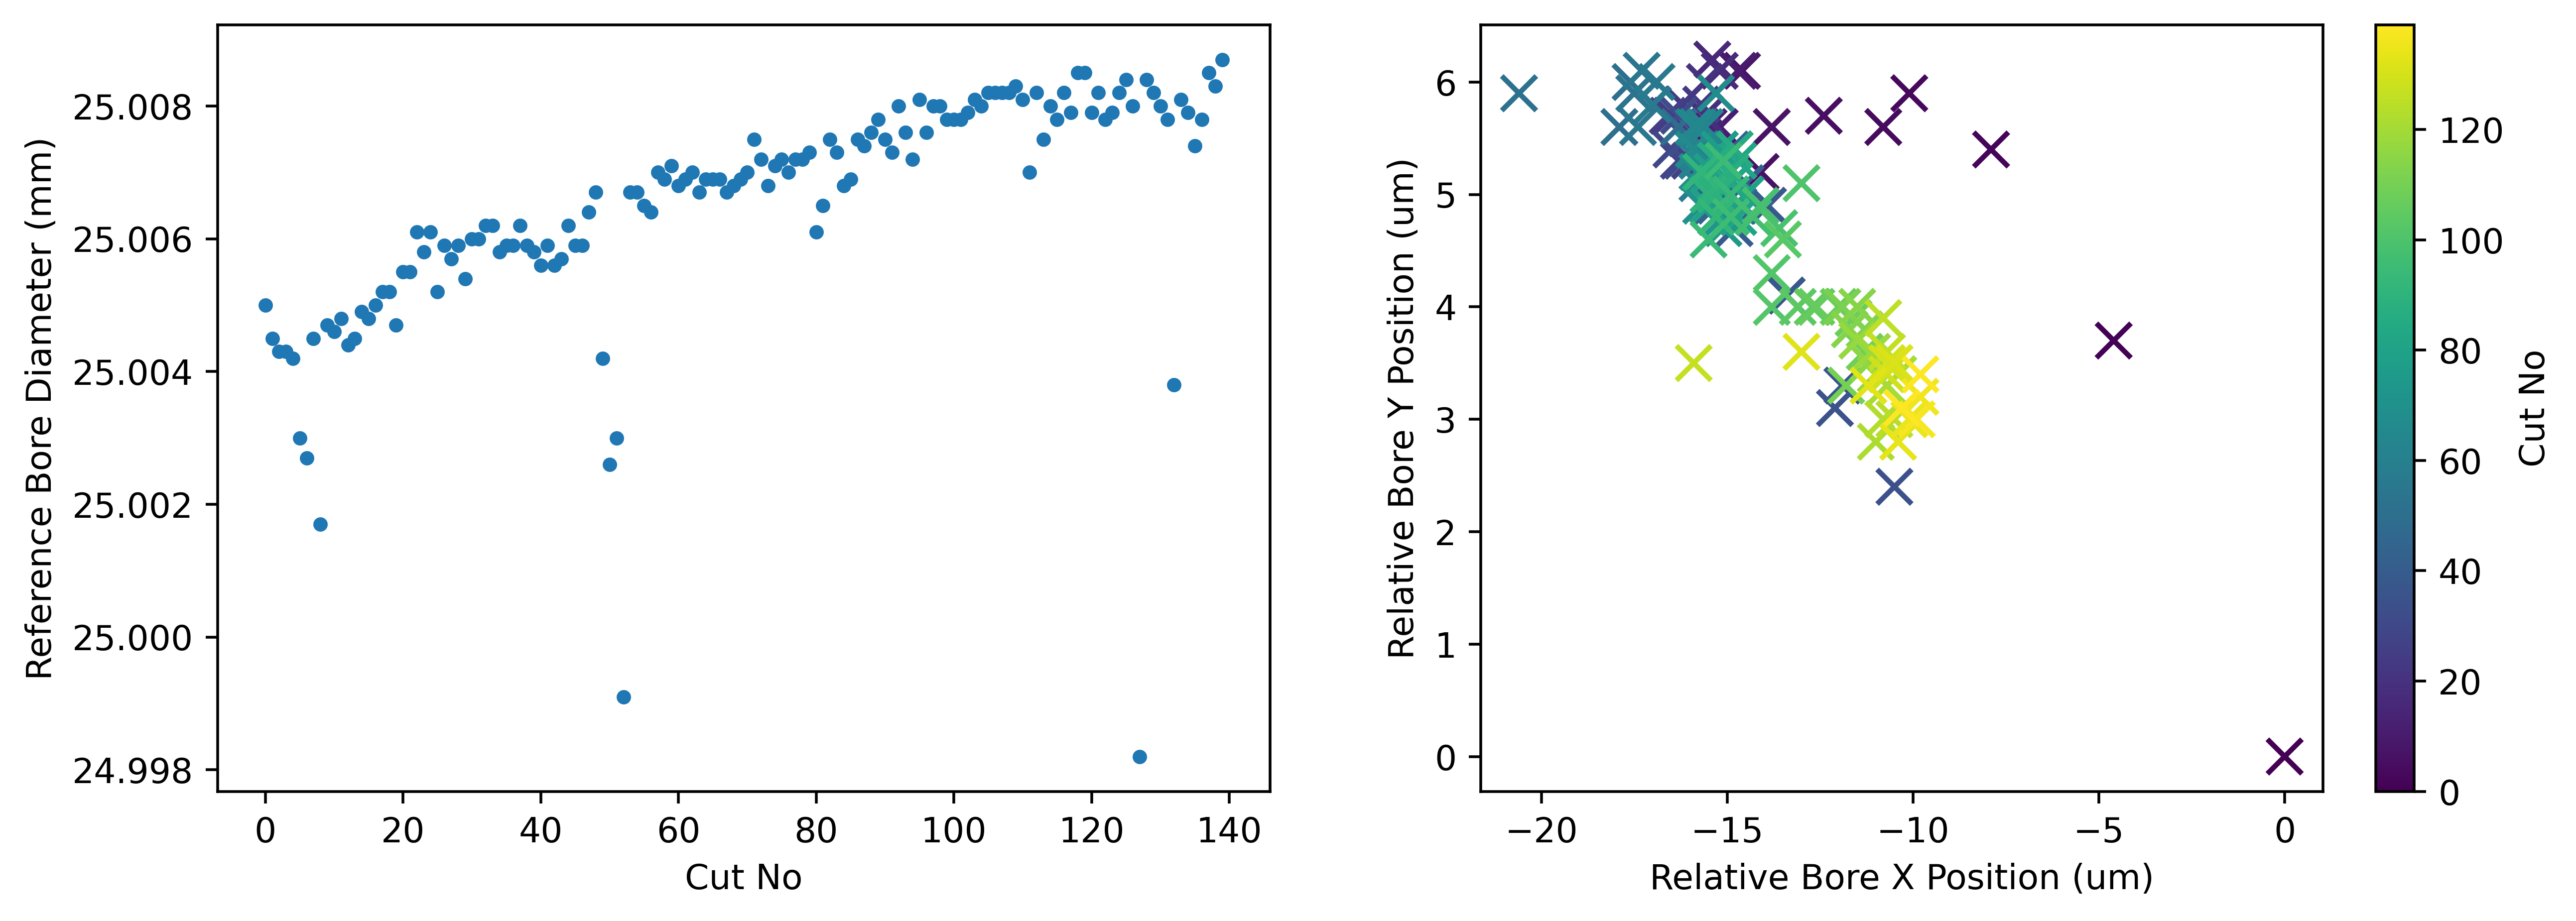

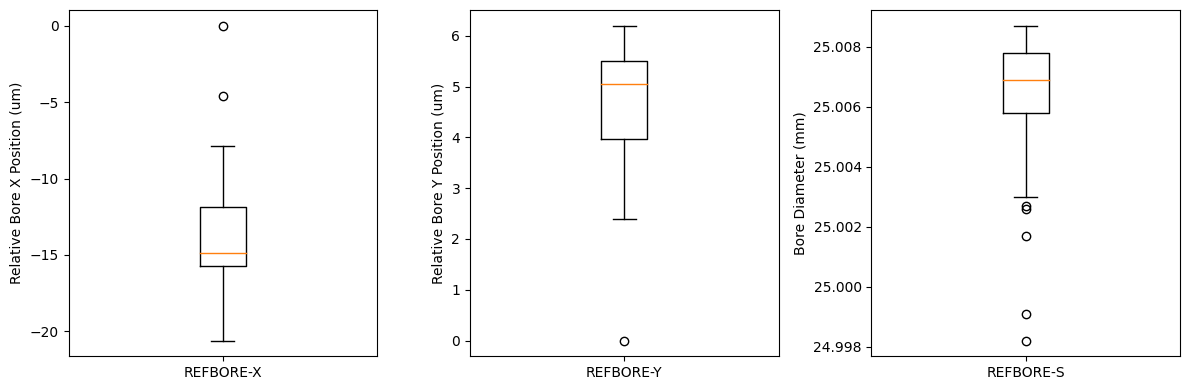

In [19]:
refbore_probe(probe_data)

## TEST 12

In [20]:
filepath = Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing\Additional Tests\24_06_04_weartest_D1.3_#1000\240604-WEARTEST.csv'
print(filepath)
assert filepath.exists()

C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\Additional Tests\24_06_04_weartest_D1.3_#1000\240604-WEARTEST.csv


In [21]:
probe_data = pd.read_csv(filepath, header=2, index_col='Cut No')
probe_data['PROBEDIFF'] = probe_data['AVGPROBE'].diff()
probe_data['PROBEDIFF'] = probe_data['PROBEDIFF'].fillna(0)
probe_data['REFBORE-X'] = (probe_data['REFBORE-X'] - probe_data['REFBORE-X'].iloc[0]) * 1000
probe_data['REFBORE-Y'] = (probe_data['REFBORE-Y'] - probe_data['REFBORE-Y'].iloc[0]) * 1000
probe_data.head()

NC4 Radius  PROBE1  PROBE2  PROBE3  PROBE4  AVGPROBE  REFBORE-X  \
Cut No                                                                    
0.0         0.6719  6.3569  6.3574  6.3564  6.3560    6.3567        0.0   
1.0         0.6721  6.3550  6.3554  6.3547  6.3540    6.3548       -1.4   
2.0         0.6705  6.3650  6.3669  6.3609  6.3649    6.3644       -1.9   
3.0         0.6729  6.3940  6.3943  6.3921  6.3922    6.3932       -1.6   
4.0         0.6697  6.4235  6.4245  6.4234  6.4229    6.4236        1.1   

        REFBORE-Y  REFBORE-S  PROBEDIFF  
Cut No                                   
0.0           0.0    25.0078     0.0000  
1.0           2.6    25.0084    -0.0019  
2.0           4.2    25.0083     0.0096  
3.0           5.3    25.0083     0.0288  
4.0           5.1    25.0086     0.0304

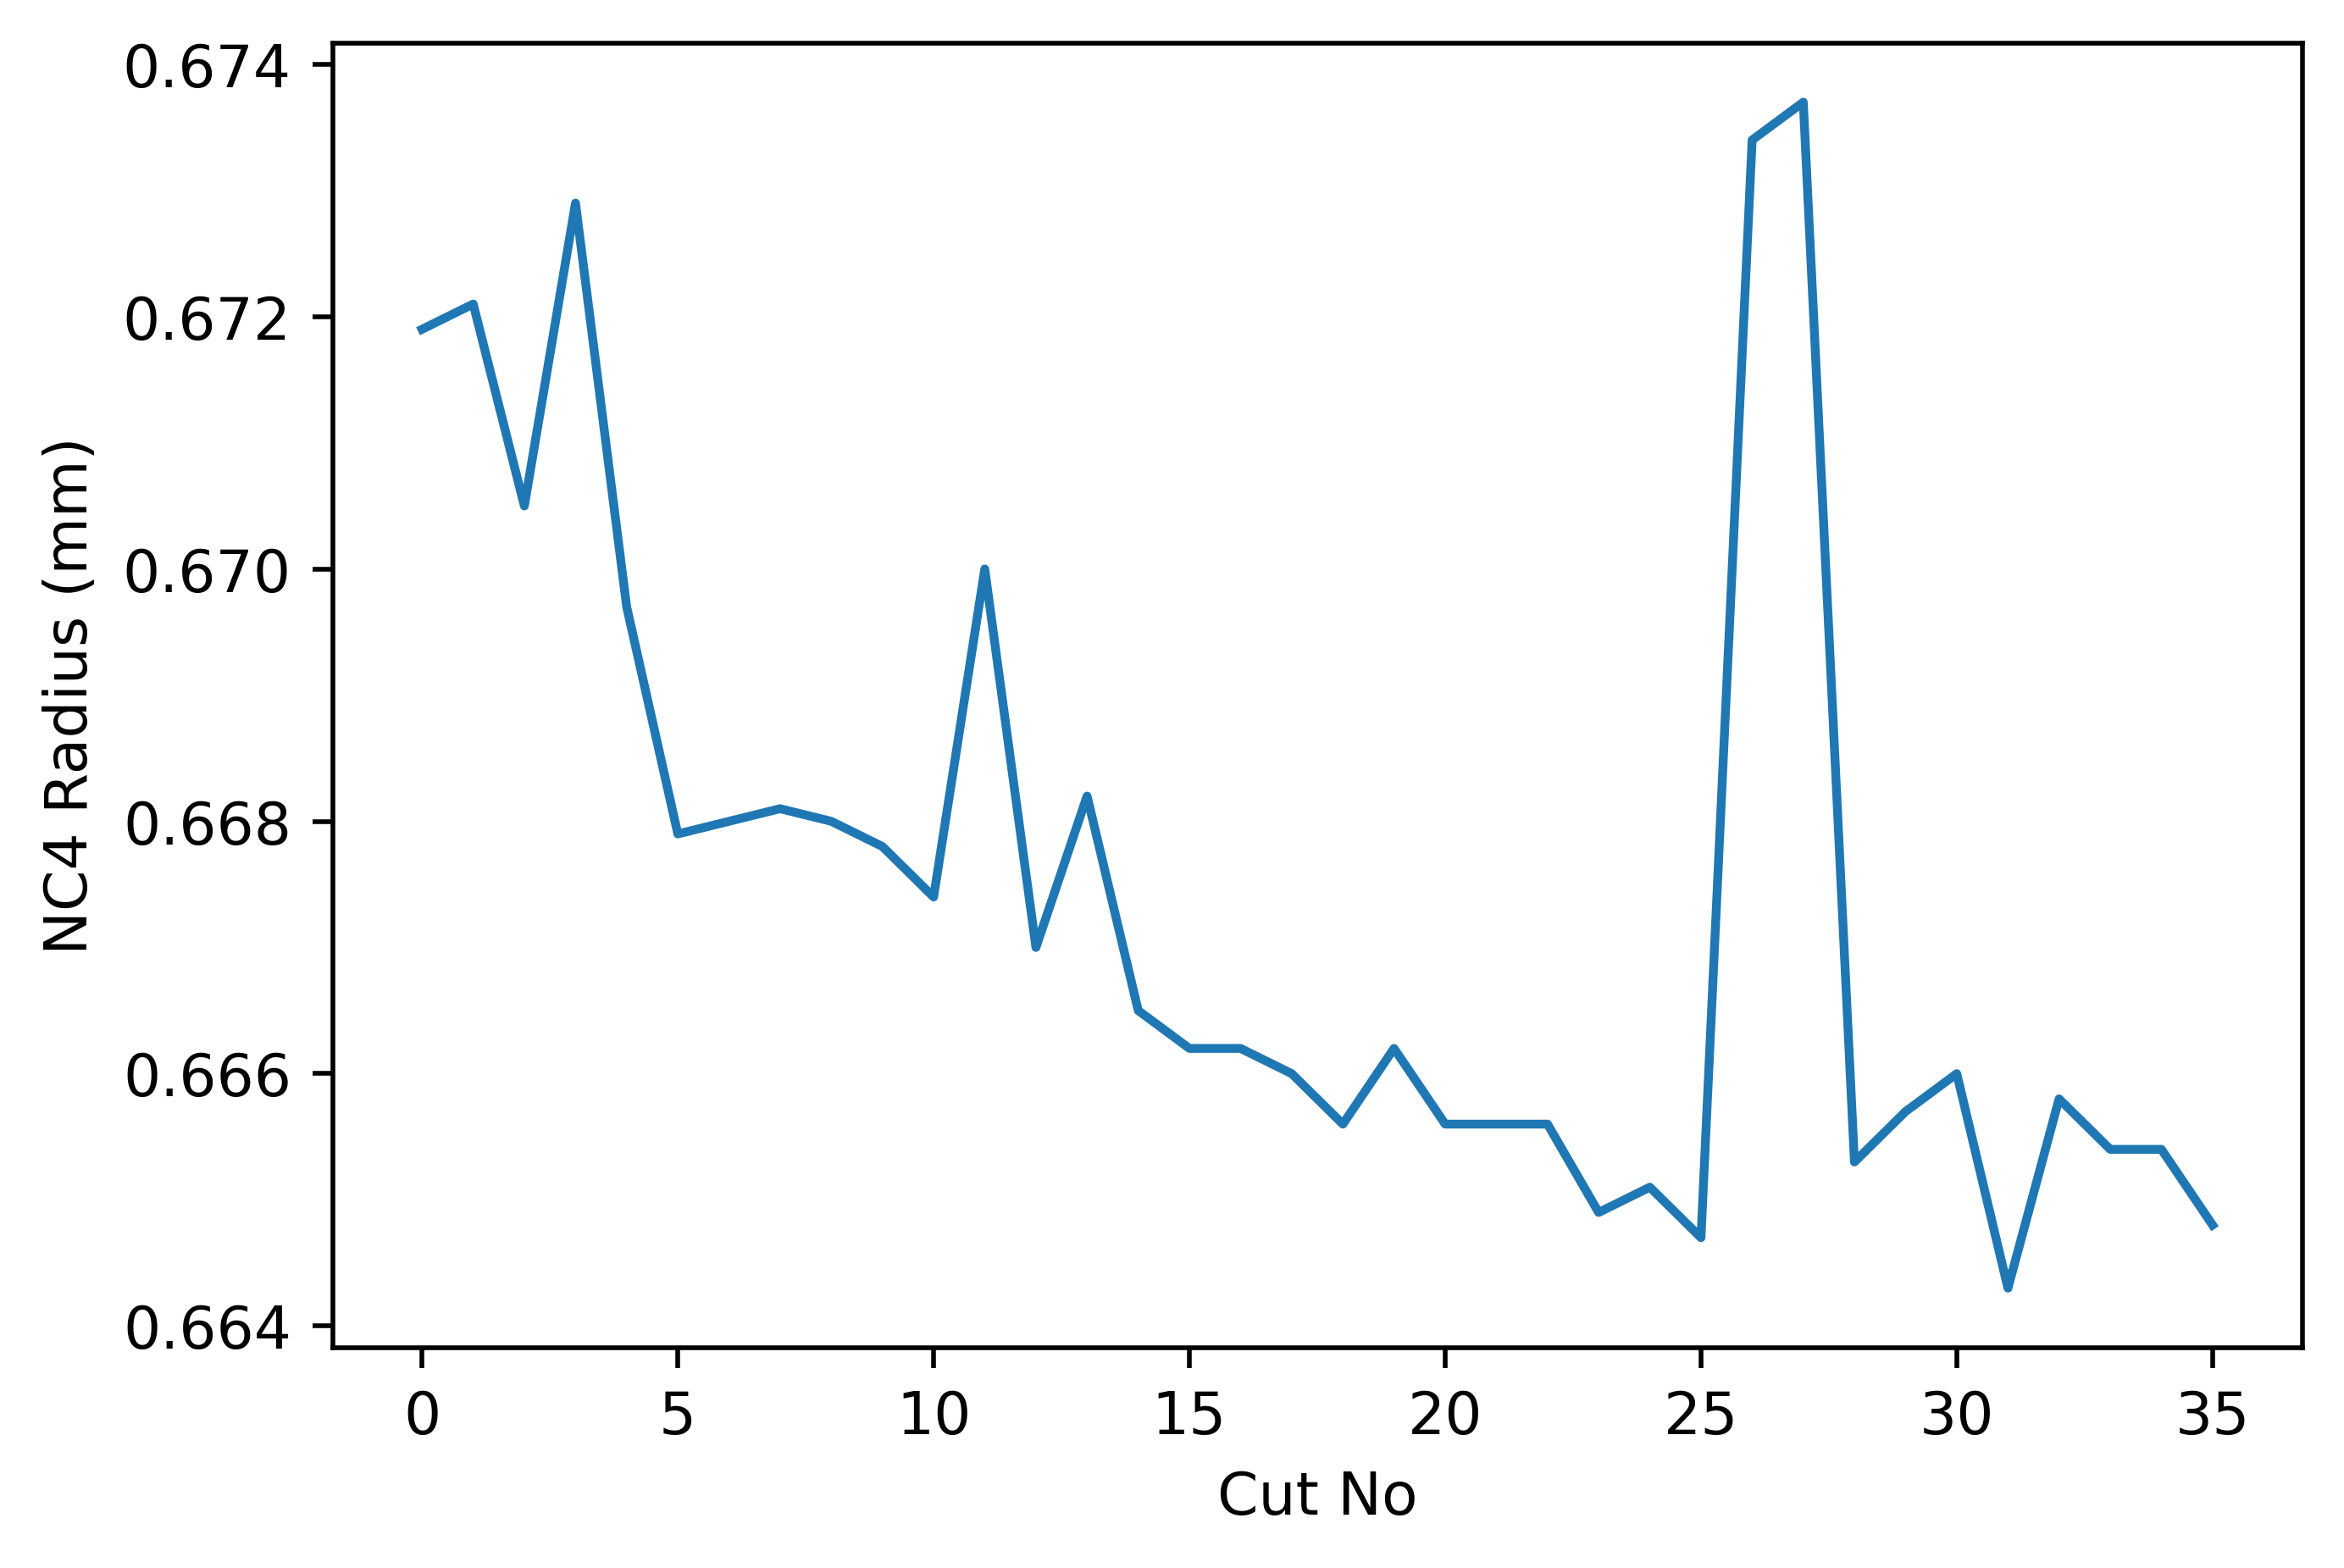

In [22]:
nc4radiusOutput(probe_data)

(<Figure size 6000x4000 with 3 Axes>,
 array([<AxesSubplot: ylabel='Radial DOC (mm)'>,
        <AxesSubplot: xlabel='Cut No', ylabel='Measured Radial DOC (mm)'>],
       dtype=object))

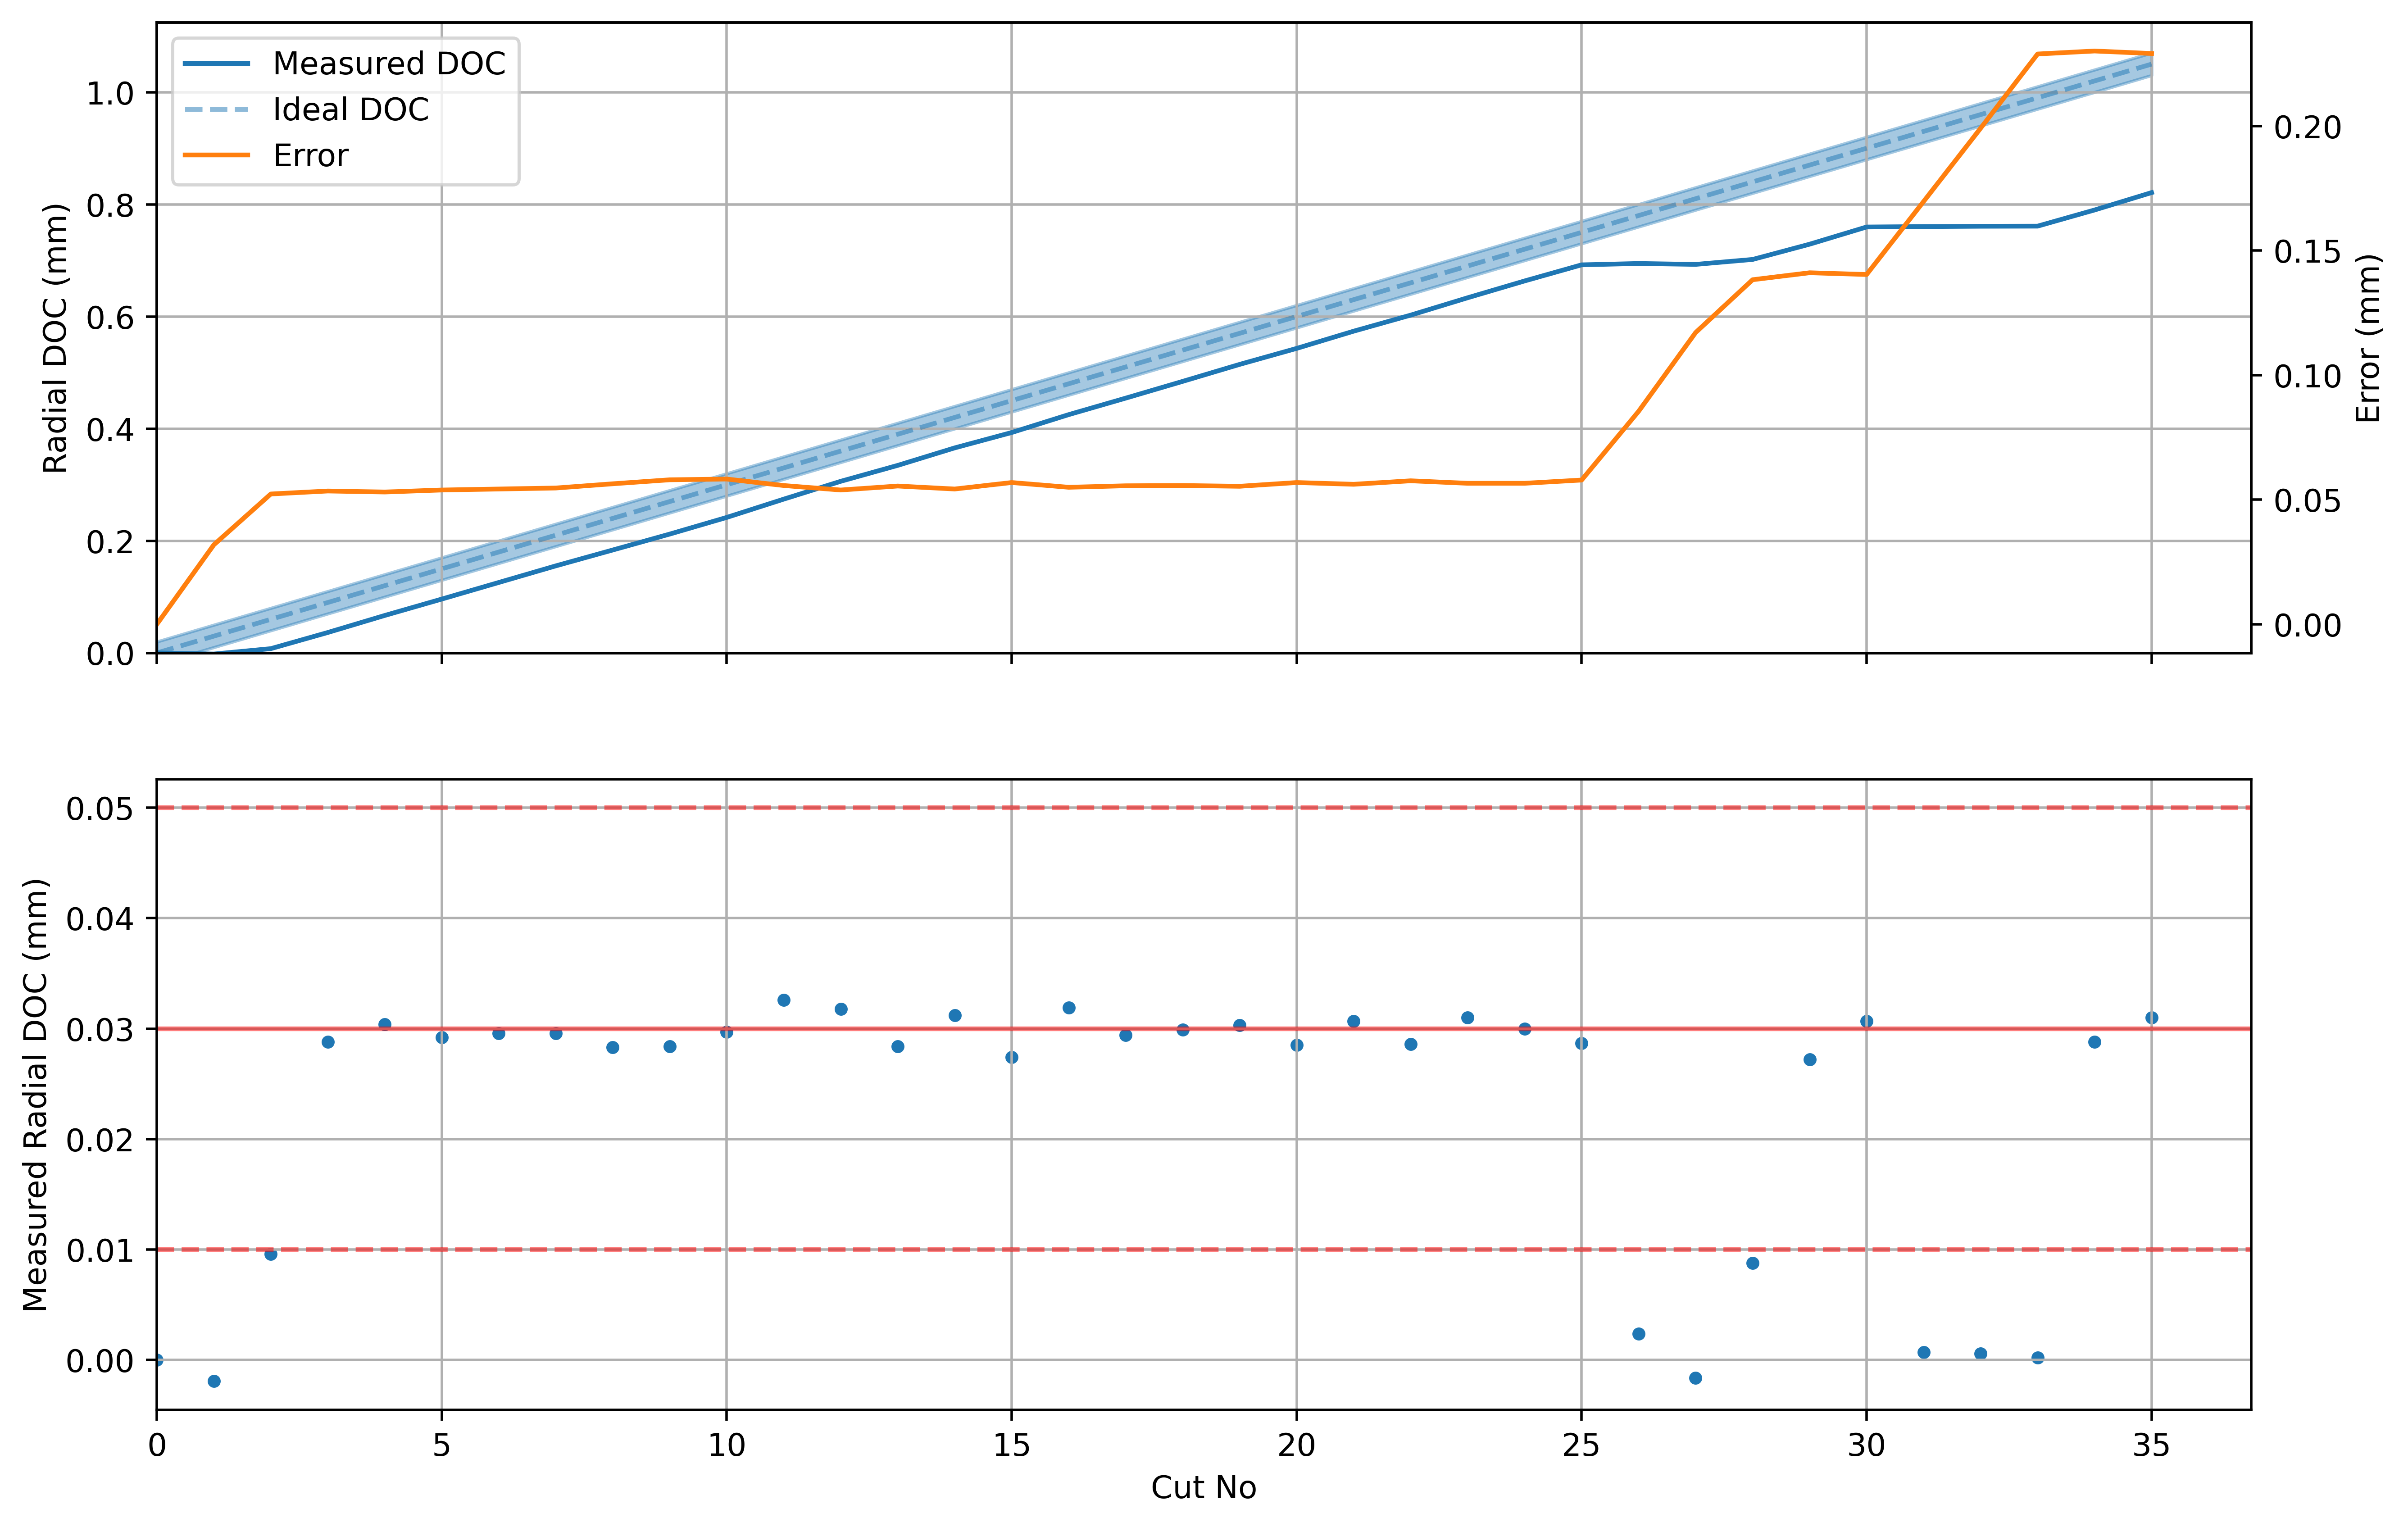

In [23]:
probeVisualise(probe_data)

REFBORE-S  REFBORE-X  REFBORE-Y
count  36.000000  36.000000  36.000000
mean   25.009192   2.244444   3.502778
std     0.000677   3.186709   4.700242
min    25.007500  -1.900000  -4.300000
25%    25.008675   0.875000  -2.950000
50%    25.009400   1.450000   5.450000
75%    25.009600   2.600000   7.425000
max    25.010200  14.400000   7.700000

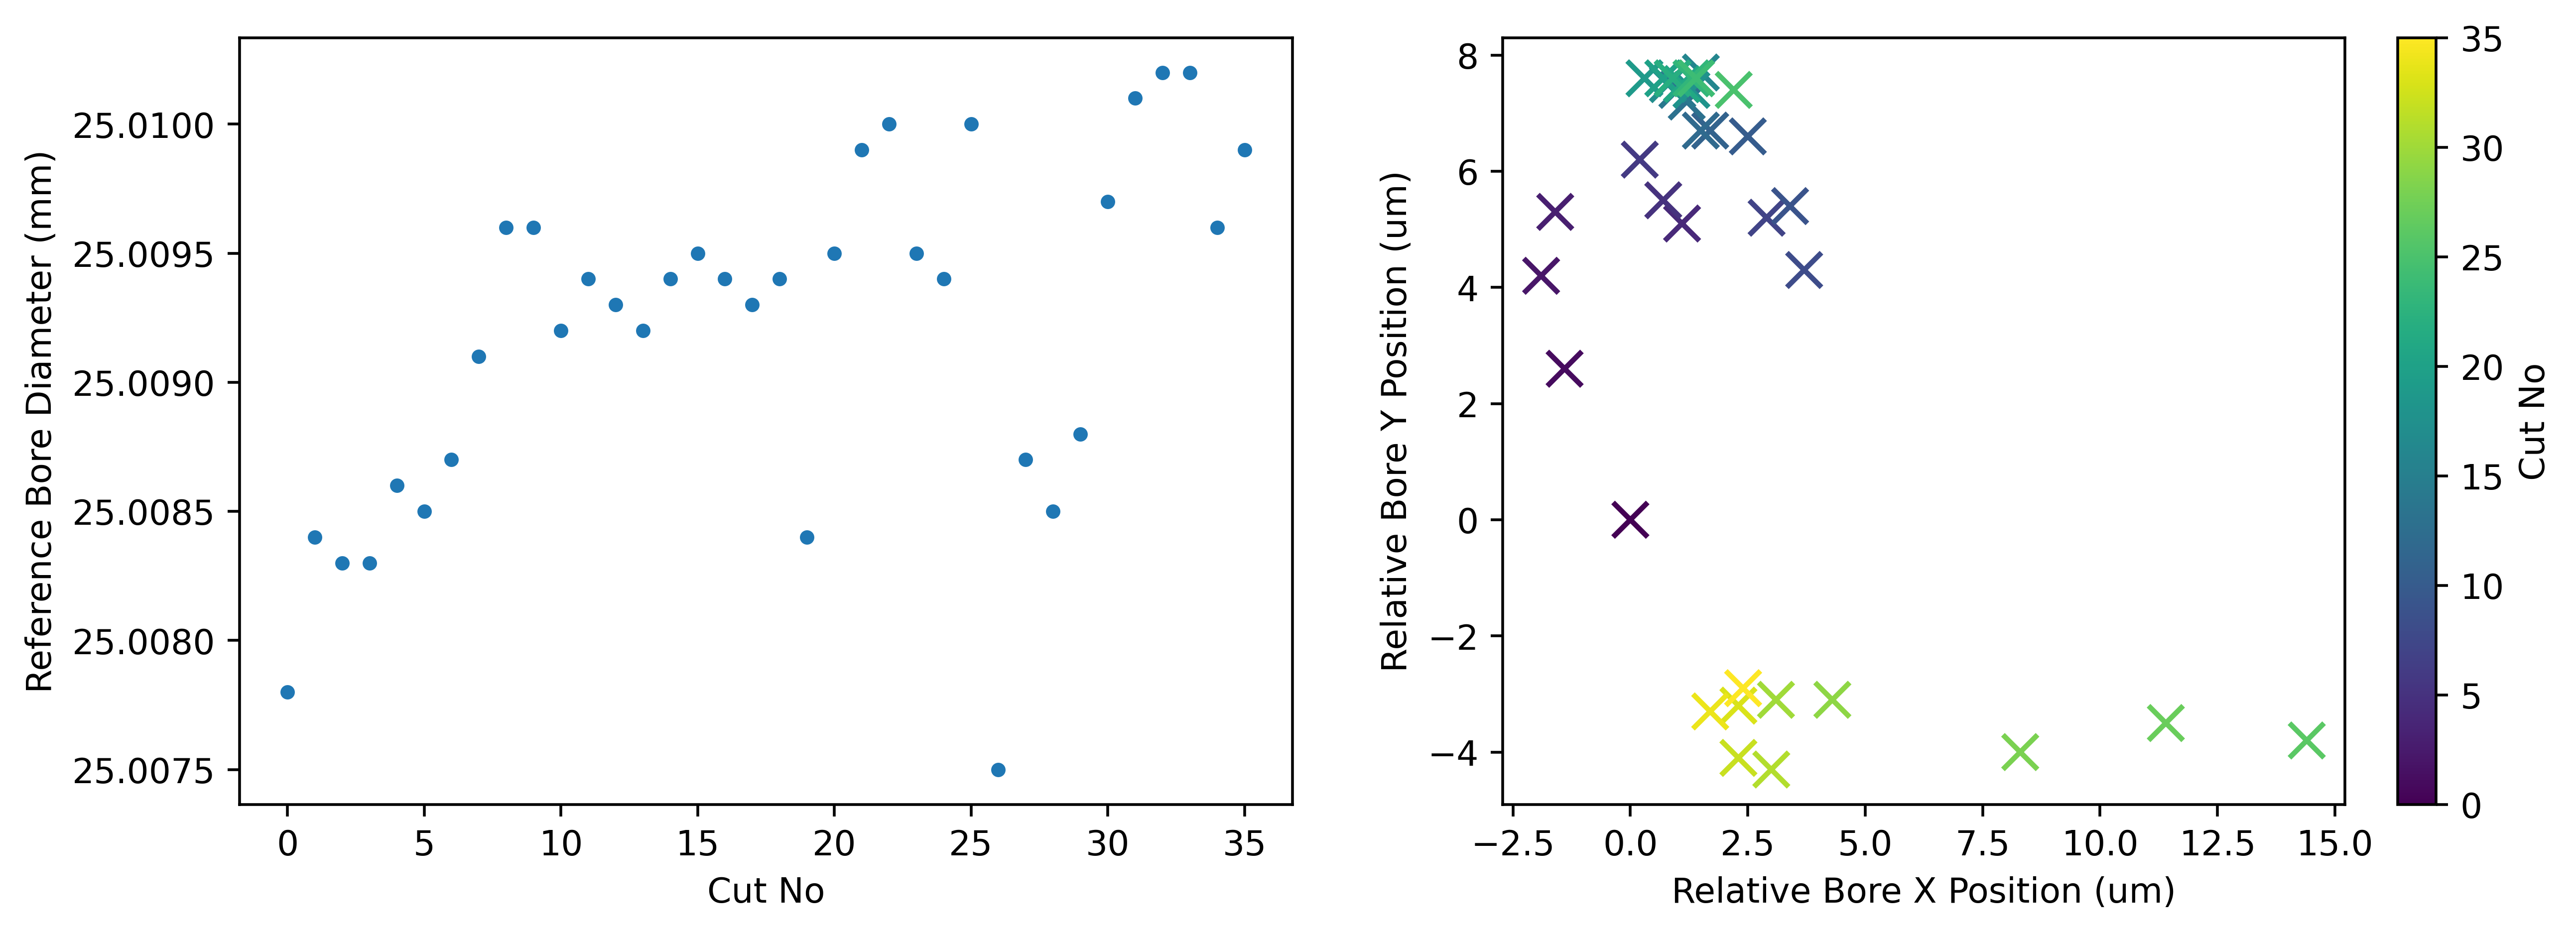

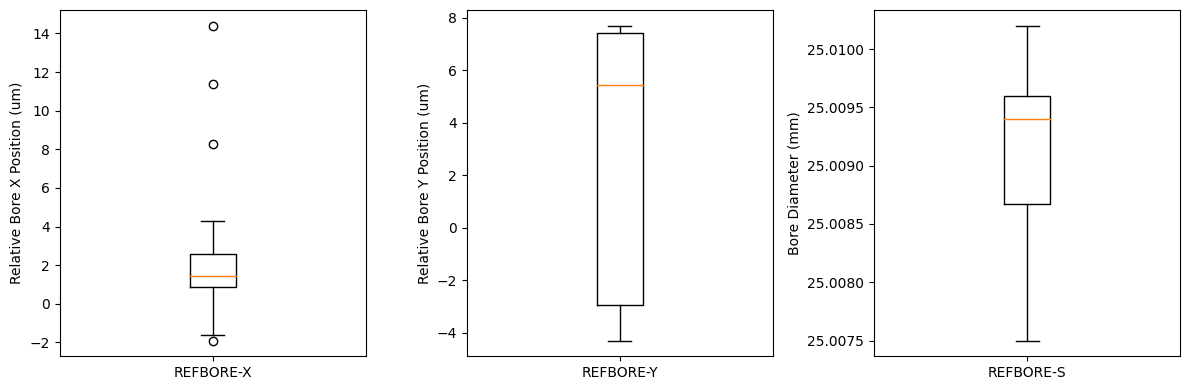

In [24]:
refbore_probe(probe_data)

## TEST 13

In [25]:
filepath = Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing\Additional Tests\24_06_05_weartest_D1.3_#1000\240605-WEARTEST.csv'
print(filepath)
assert filepath.exists()

C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\Additional Tests\24_06_05_weartest_D1.3_#1000\240605-WEARTEST.csv


In [26]:
probe_data = pd.read_csv(filepath, header=2, index_col='Cut No')
probe_data['PROBEDIFF'] = probe_data['AVGPROBE'].diff()
probe_data['PROBEDIFF'] = probe_data['PROBEDIFF'].fillna(0)
probe_data['REFBORE-X'] = (probe_data['REFBORE-X'] - probe_data['REFBORE-X'].iloc[0]) * 1000
probe_data['REFBORE-Y'] = (probe_data['REFBORE-Y'] - probe_data['REFBORE-Y'].iloc[0]) * 1000
probe_data.head()

NC4 Radius  PROBE1  PROBE2  PROBE3  PROBE4  AVGPROBE  REFBORE-X  \
Cut No                                                                    
0.0         0.6613  7.2083  7.2072  7.2046  7.2070    7.2068        0.0   
1.0         0.6602  7.2088  7.2078  7.2076  7.2073    7.2079       -1.2   
2.0         0.6594  7.2199  7.2192  7.2192  7.2186    7.2193       -1.9   
3.0         0.6591  7.2483  7.2459  7.2465  7.2448    7.2463       -4.8   
4.0         0.6571  7.2760  7.2745  7.2747  7.2746    7.2749       -4.9   

        REFBORE-Y  REFBORE-S  PROBEDIFF  
Cut No                                   
0.0           0.0    25.0103     0.0000  
1.0           1.9    25.0102     0.0011  
2.0           2.3    25.0103     0.0114  
3.0           2.6    25.0097     0.0270  
4.0           1.9    25.0095     0.0286

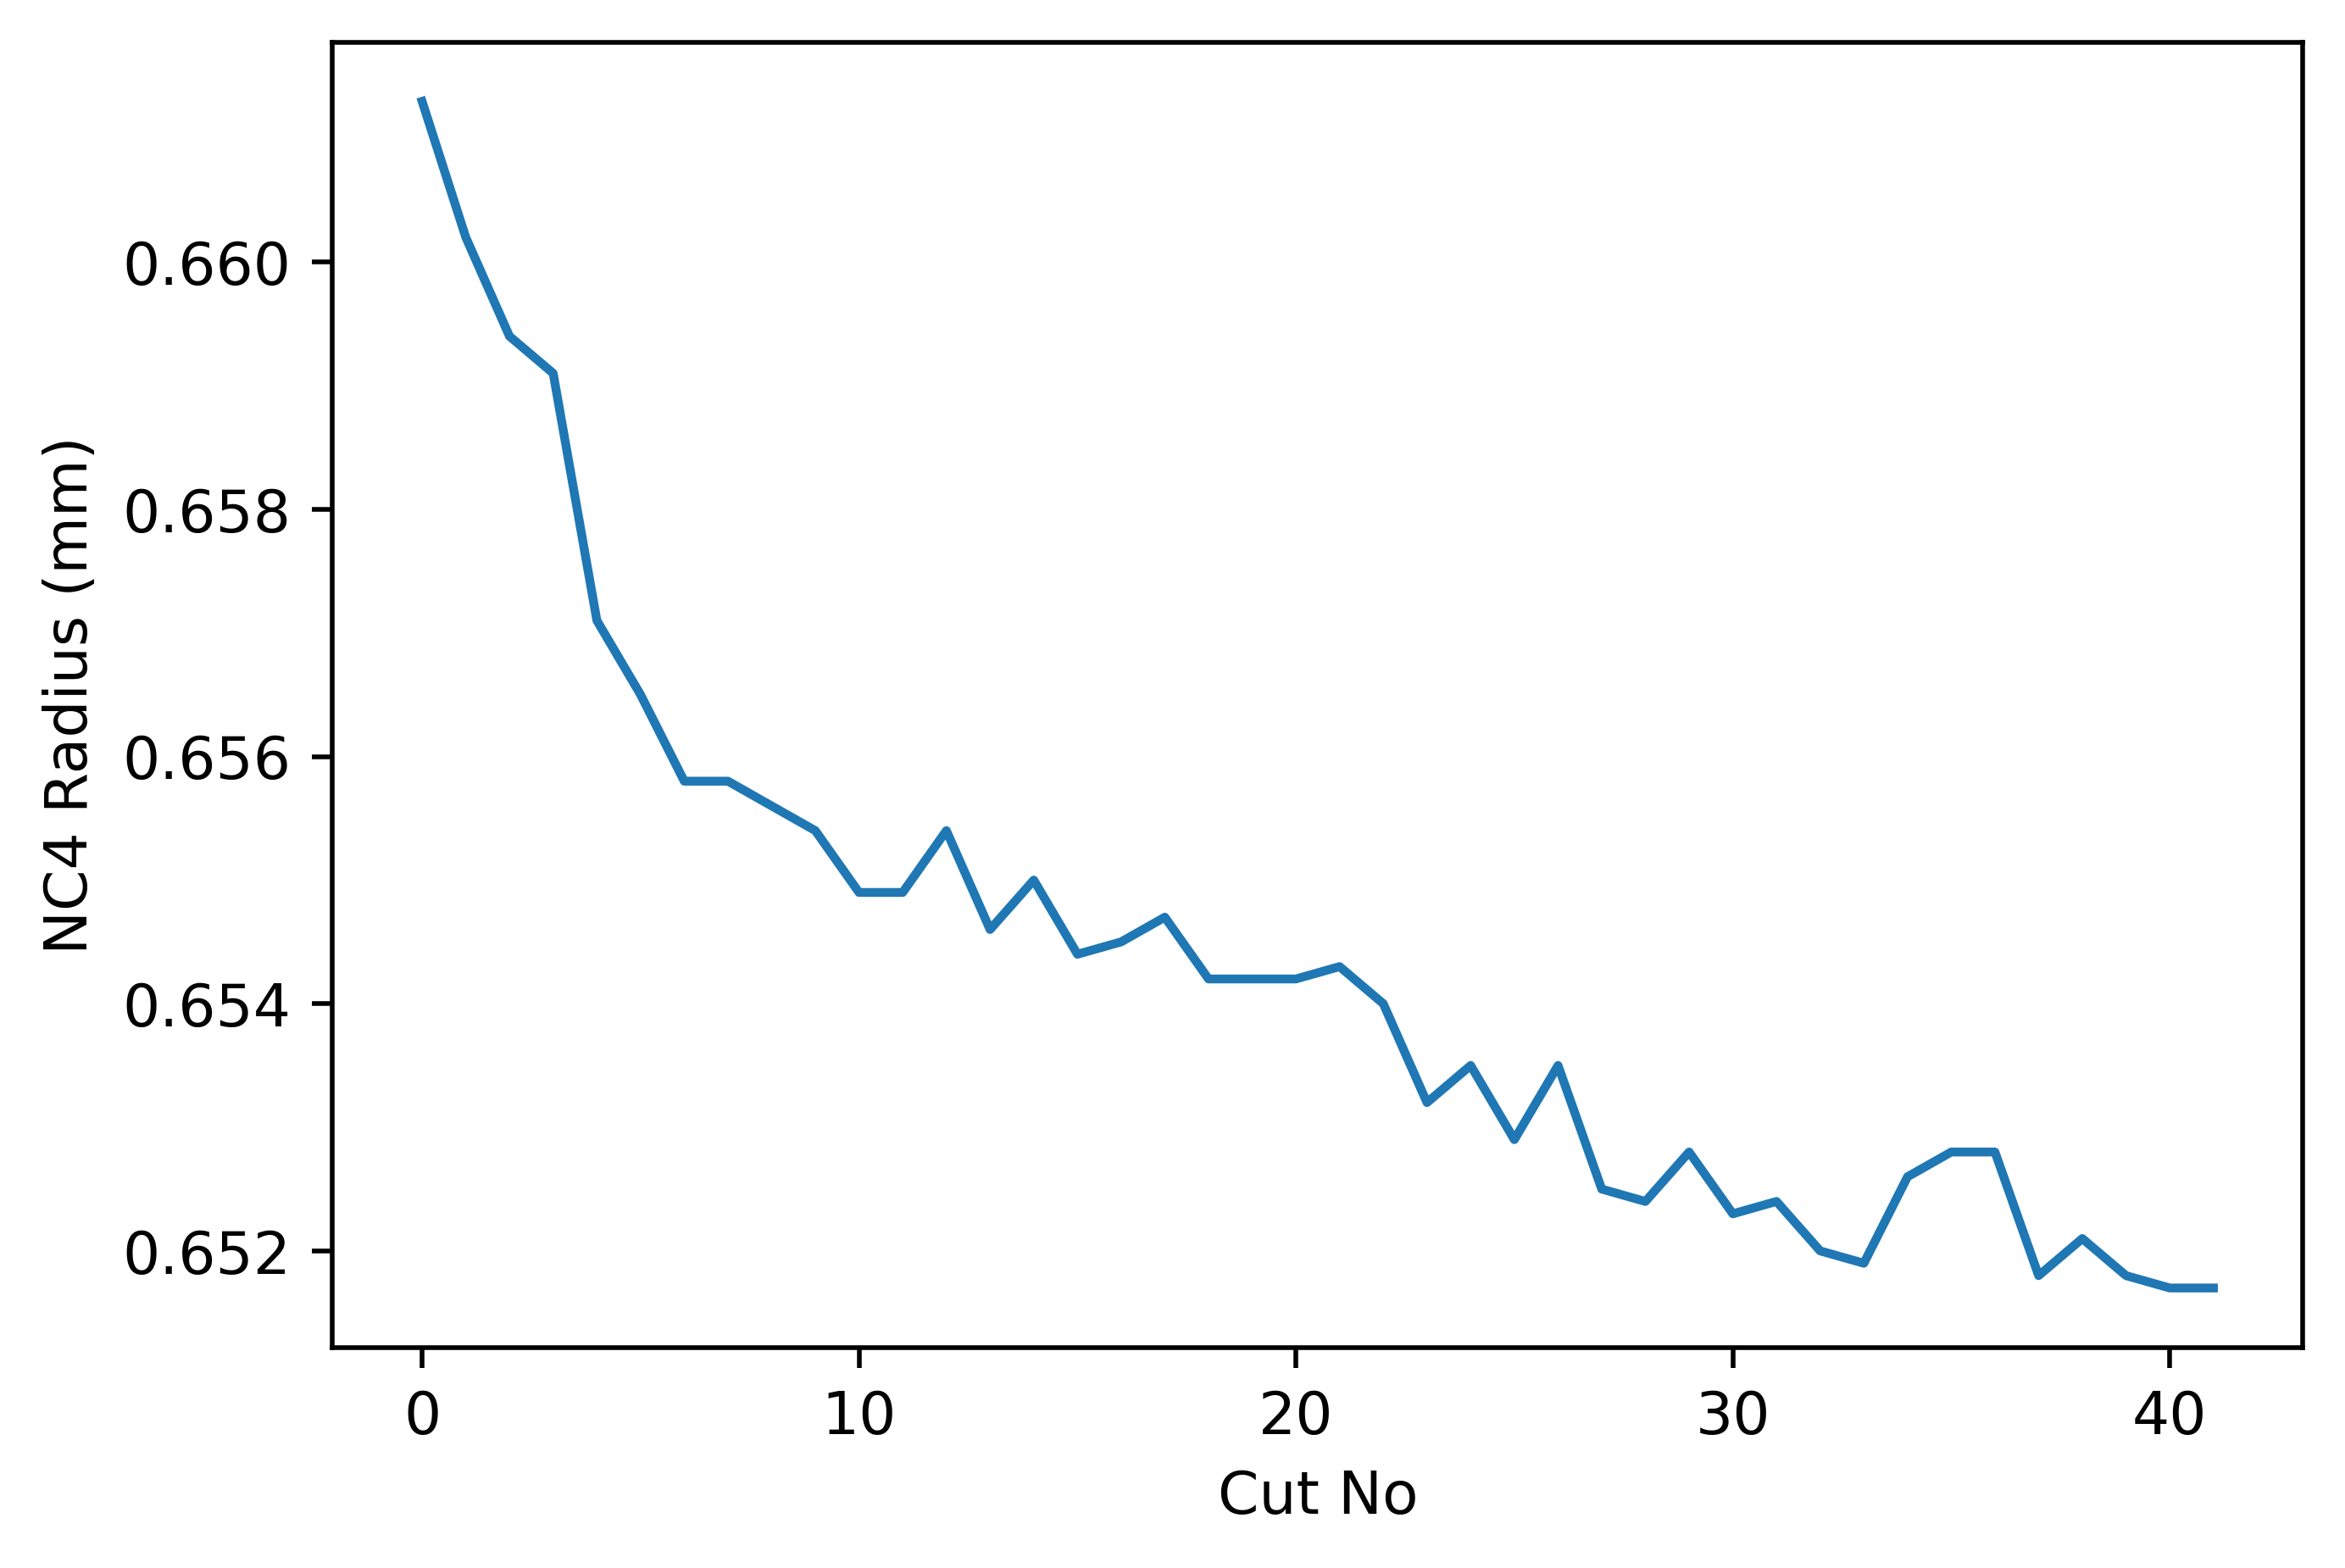

In [27]:
nc4radiusOutput(probe_data)

(<Figure size 6000x4000 with 3 Axes>,
 array([<AxesSubplot: ylabel='Radial DOC (mm)'>,
        <AxesSubplot: xlabel='Cut No', ylabel='Measured Radial DOC (mm)'>],
       dtype=object))

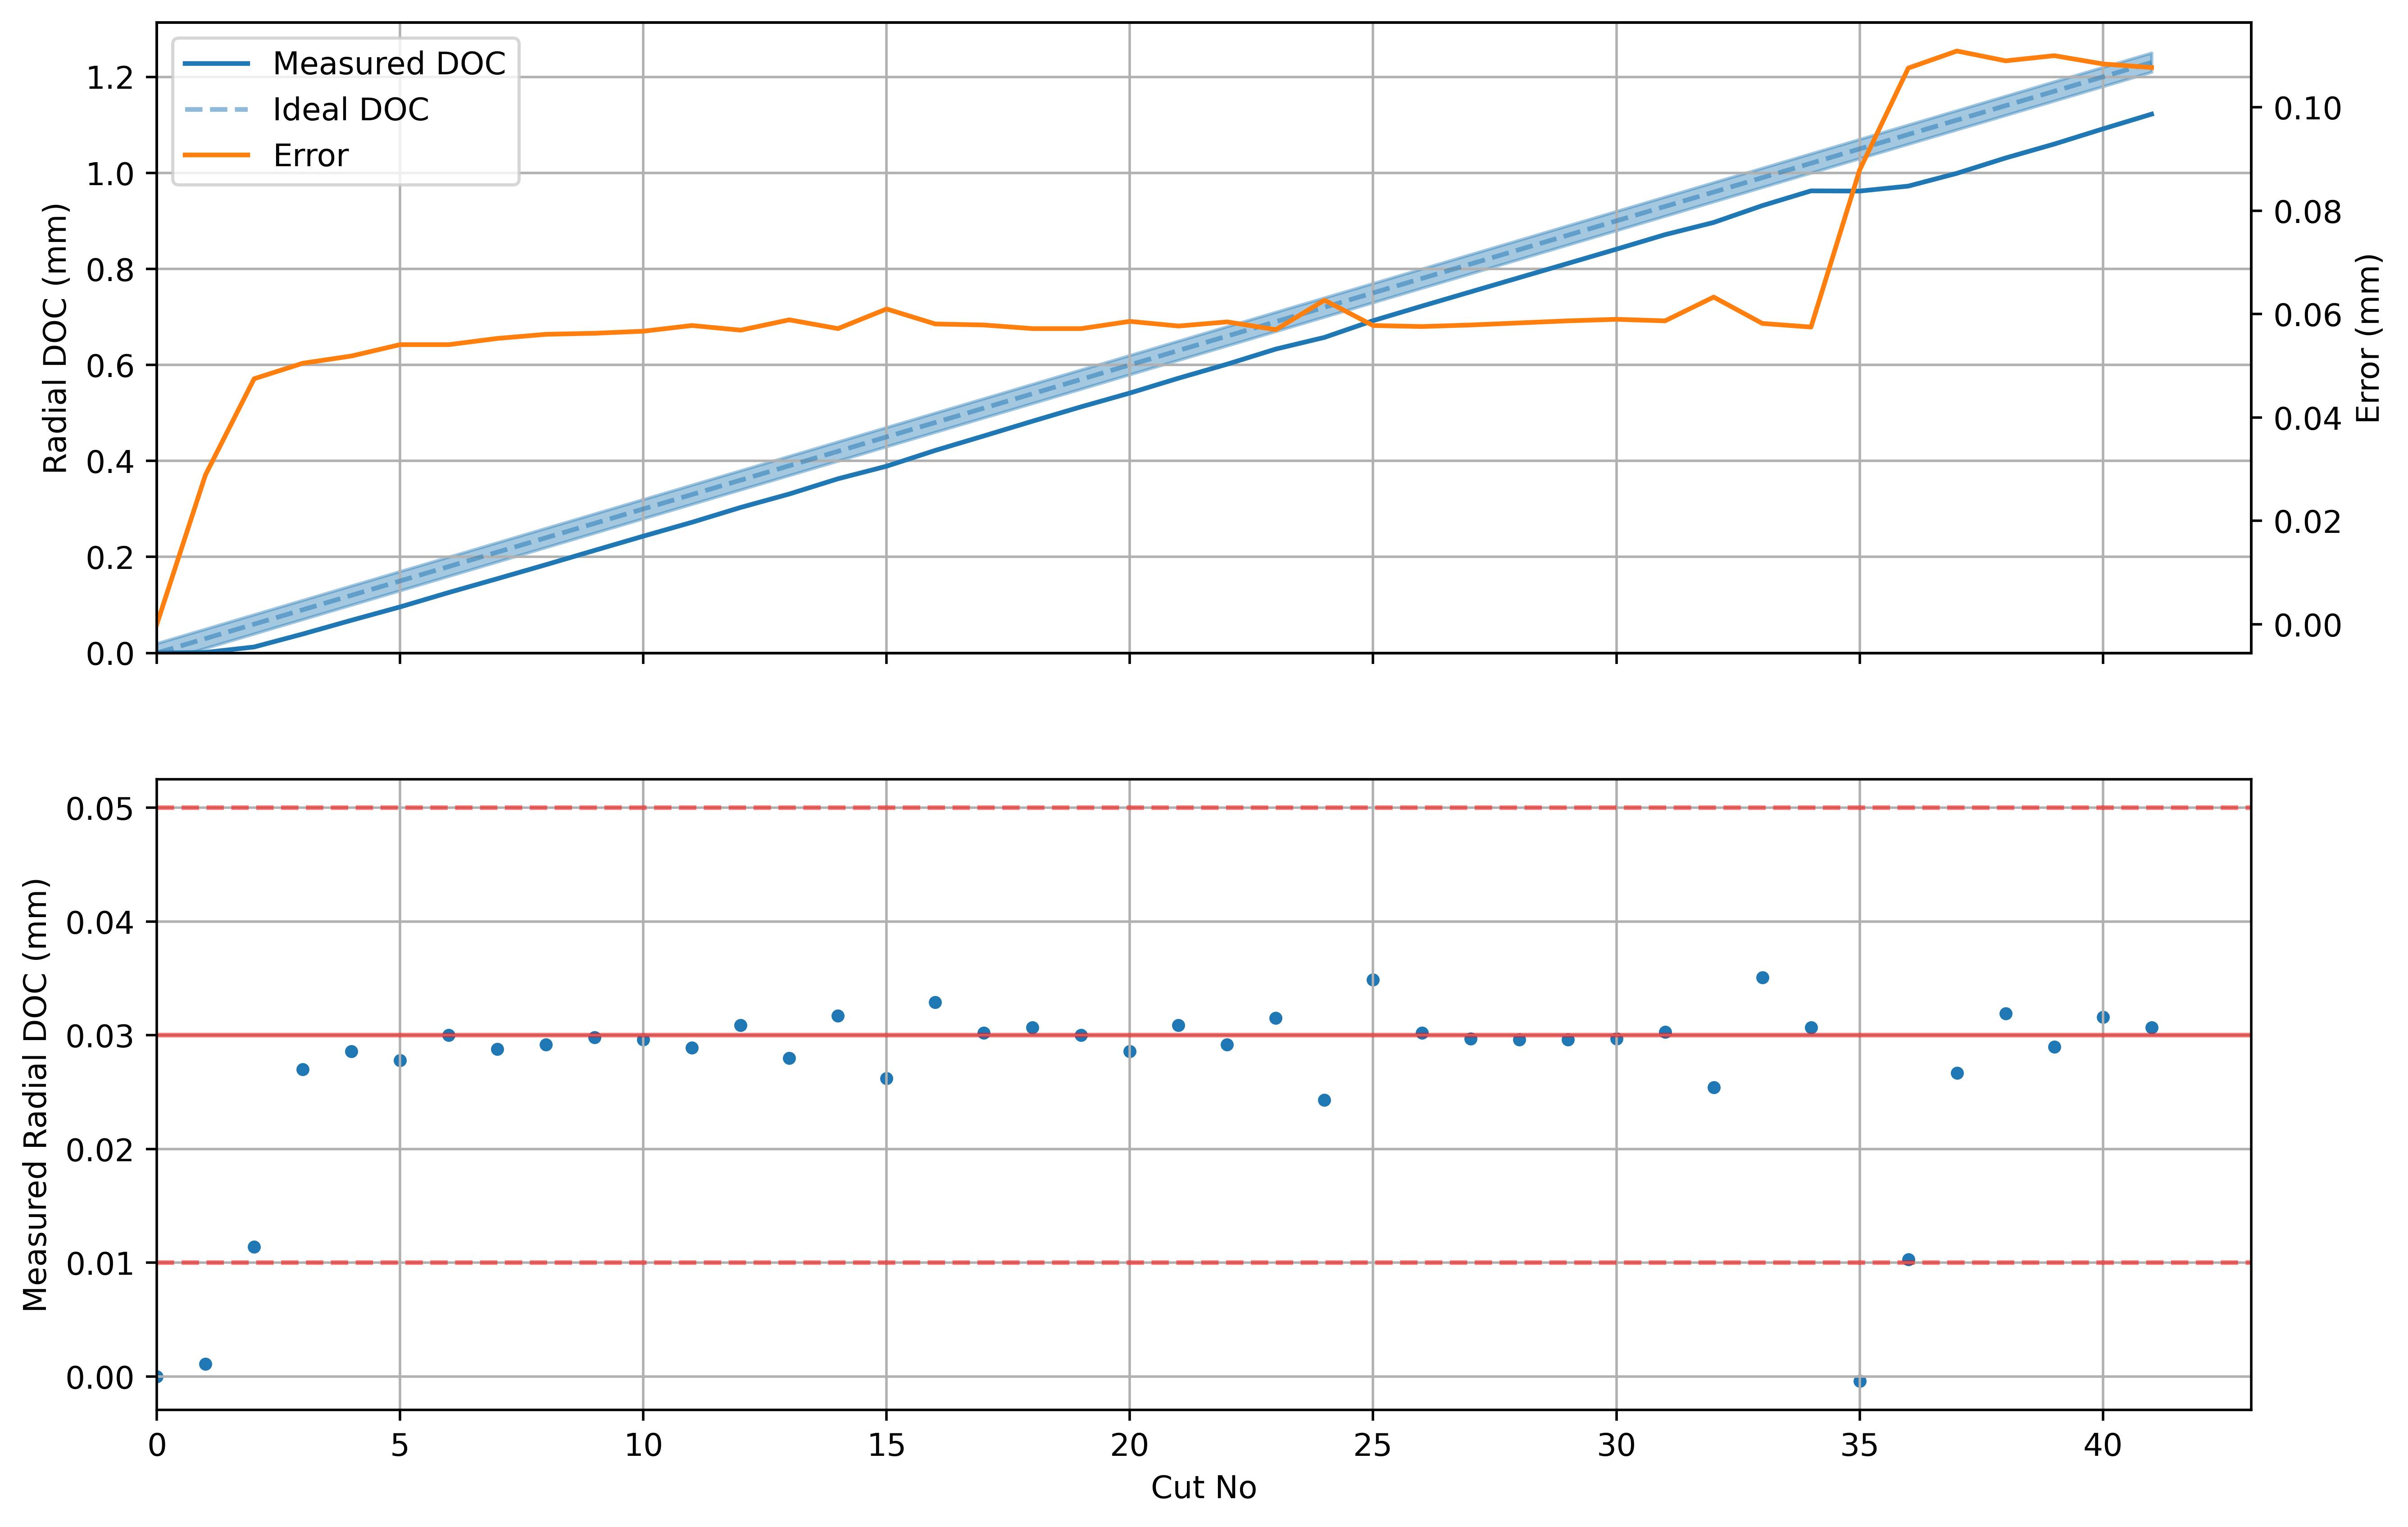

In [28]:
probeVisualise(probe_data)

REFBORE-S  REFBORE-X  REFBORE-Y
count  42.000000  42.000000  42.000000
mean   25.010626  -3.200000   6.028571
std     0.000553   0.931037   2.560610
min    25.009500  -4.900000   0.000000
25%    25.010125  -3.600000   4.325000
50%    25.010700  -3.300000   6.250000
75%    25.011075  -2.900000   8.175000
max    25.011900   0.000000  10.700000

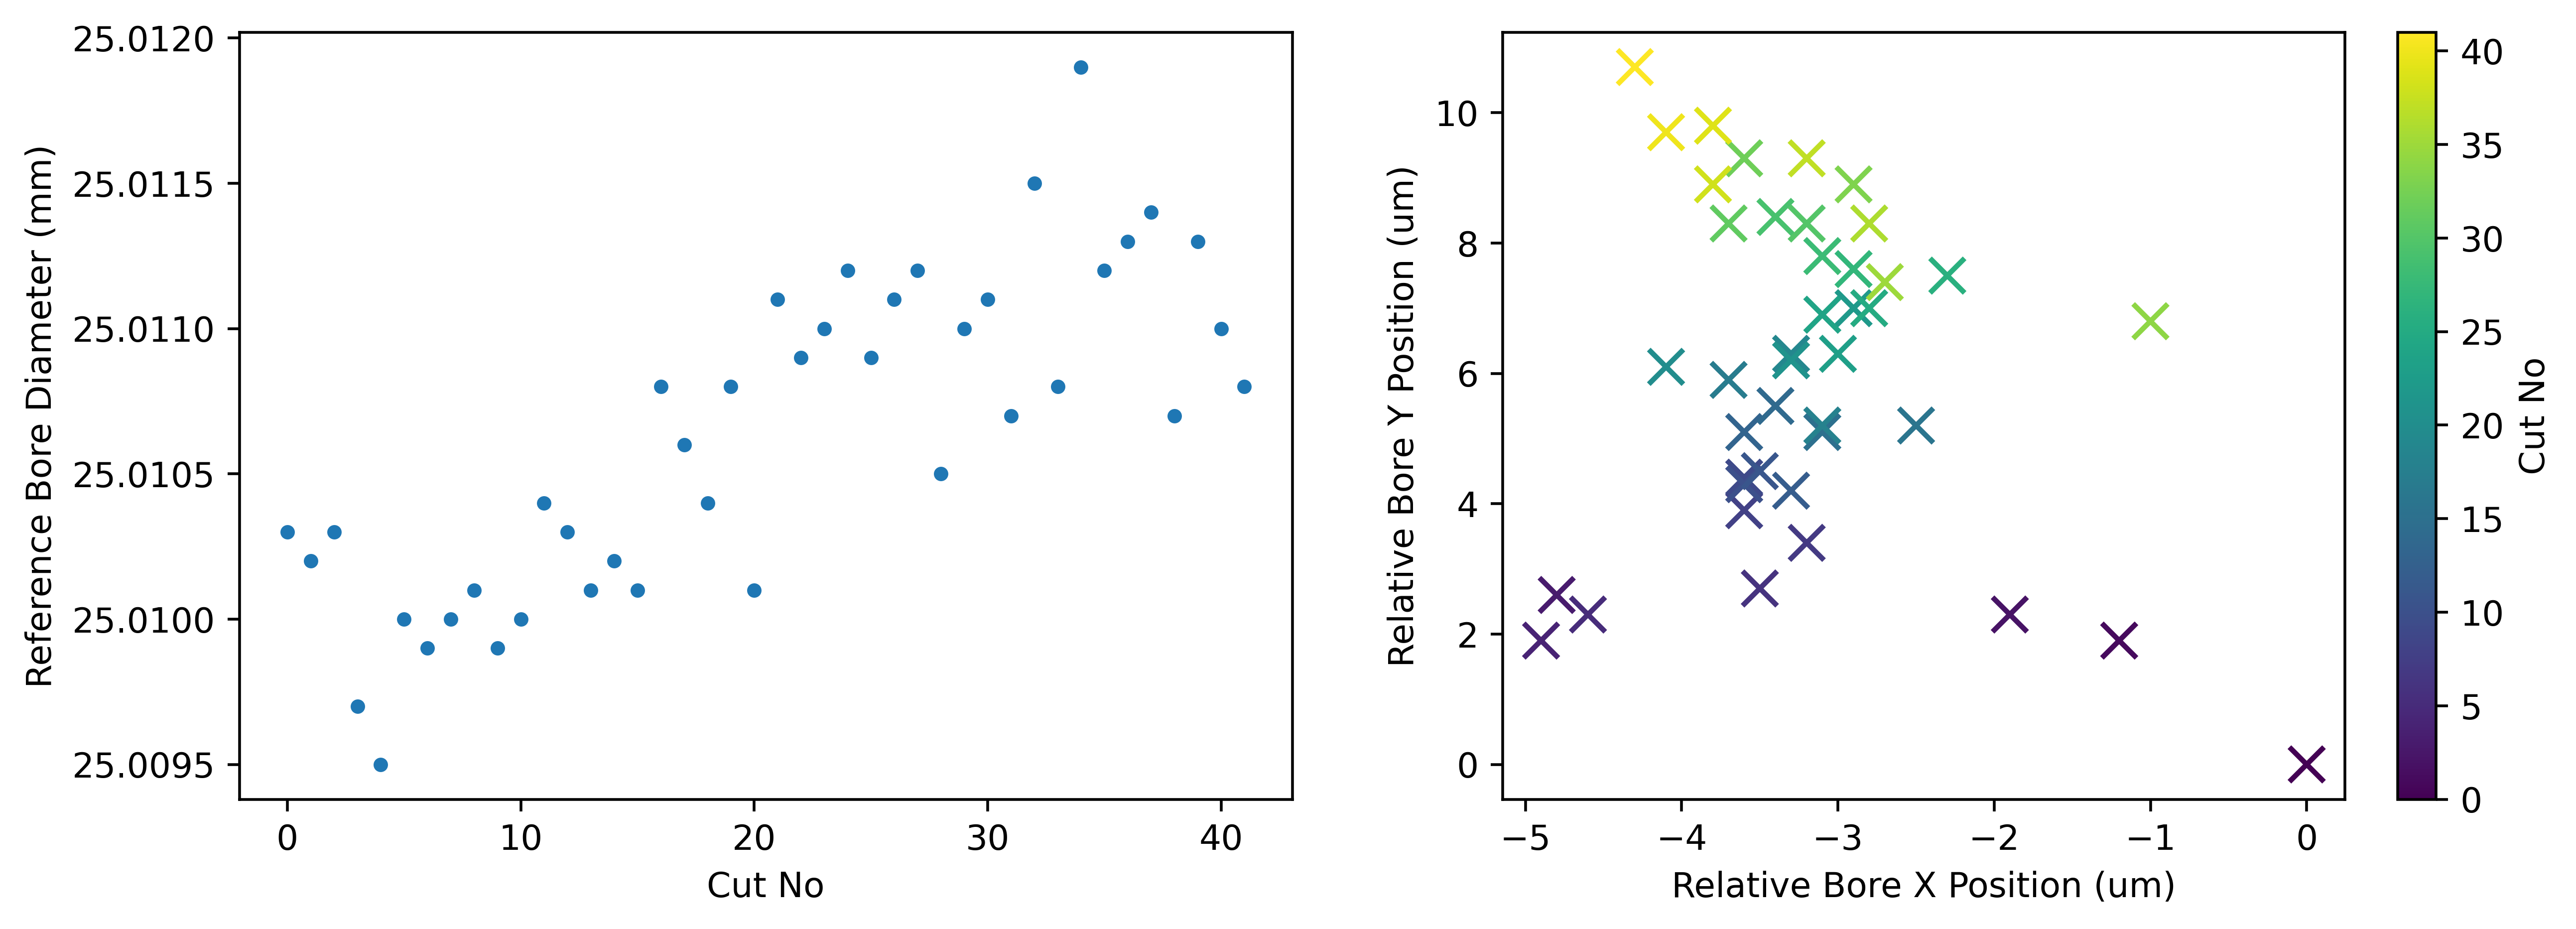

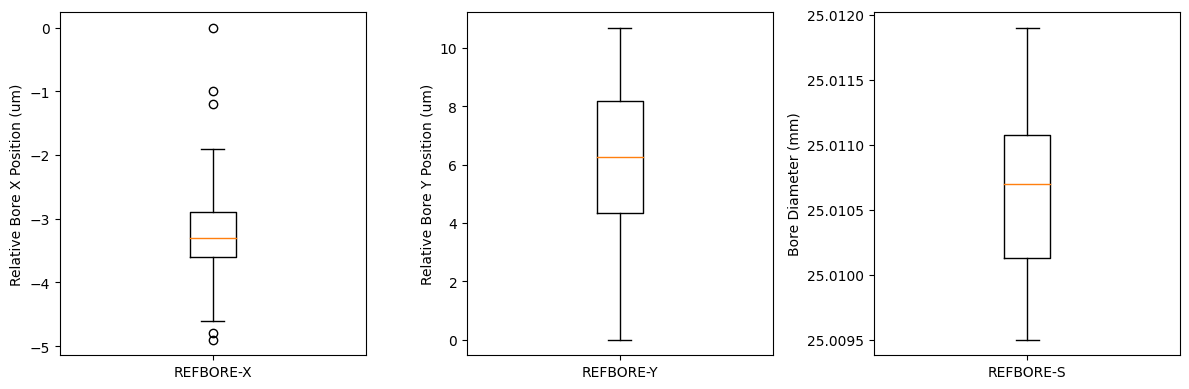

In [29]:
refbore_probe(probe_data)

## Test 14

In [30]:
filepath = Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_06_10_weartest_D1.3_#1000\240610-WEARTEST.csv'
print(filepath)
assert filepath.exists()

C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_06_10_weartest_D1.3_#1000\240610-WEARTEST.csv


In [31]:
probe_data = pd.read_csv(filepath, header=2)
probe_data['PROBEDIFF'] = probe_data['AVGPROBE'].diff()
probe_data['PROBEDIFF'] = probe_data['PROBEDIFF'].fillna(0)
probe_data['REFBORE-X'] = (probe_data['REFBORE-X'] - probe_data['REFBORE-X'].iloc[0]) * 1000
probe_data['REFBORE-Y'] = (probe_data['REFBORE-Y'] - probe_data['REFBORE-Y'].iloc[0]) * 1000
# probe_data['Cut No'] = probe_data['Cut No'] - 1
probe_data.set_index('Cut No', inplace=True)
probe_data['AVGPROBE'] = probe_data['AVGPROBE'] - probe_data['AVGPROBE'].iloc[0]
probe_data.head()

NC4 Radius  PROBE1  PROBE2  PROBE3  PROBE4  AVGPROBE  REFBORE-X  \
Cut No                                                                    
0.0         0.6621  8.3606  8.3611  8.3601  8.3600    0.0000        0.0   
1.0         0.6634  8.3611  8.3615  8.3610  8.3604    0.0005       -5.7   
2.0         0.6605  8.3896  8.3850  8.3812  8.3893    0.0258       -7.9   
3.0         0.6612  8.4214  8.4216  8.4215  8.4215    0.0610      -10.5   
4.0         0.6604  8.4525  8.4534  8.4526  8.4531    0.0924      -12.1   

        REFBORE-Y  REFBORE-S  PROBEDIFF  
Cut No                                   
0.0           0.0    25.0072     0.0000  
1.0          -1.7    25.0108     0.0005  
2.0          -1.8    25.0115     0.0253  
3.0          -1.8    25.0113     0.0352  
4.0          -2.1    25.0114     0.0314

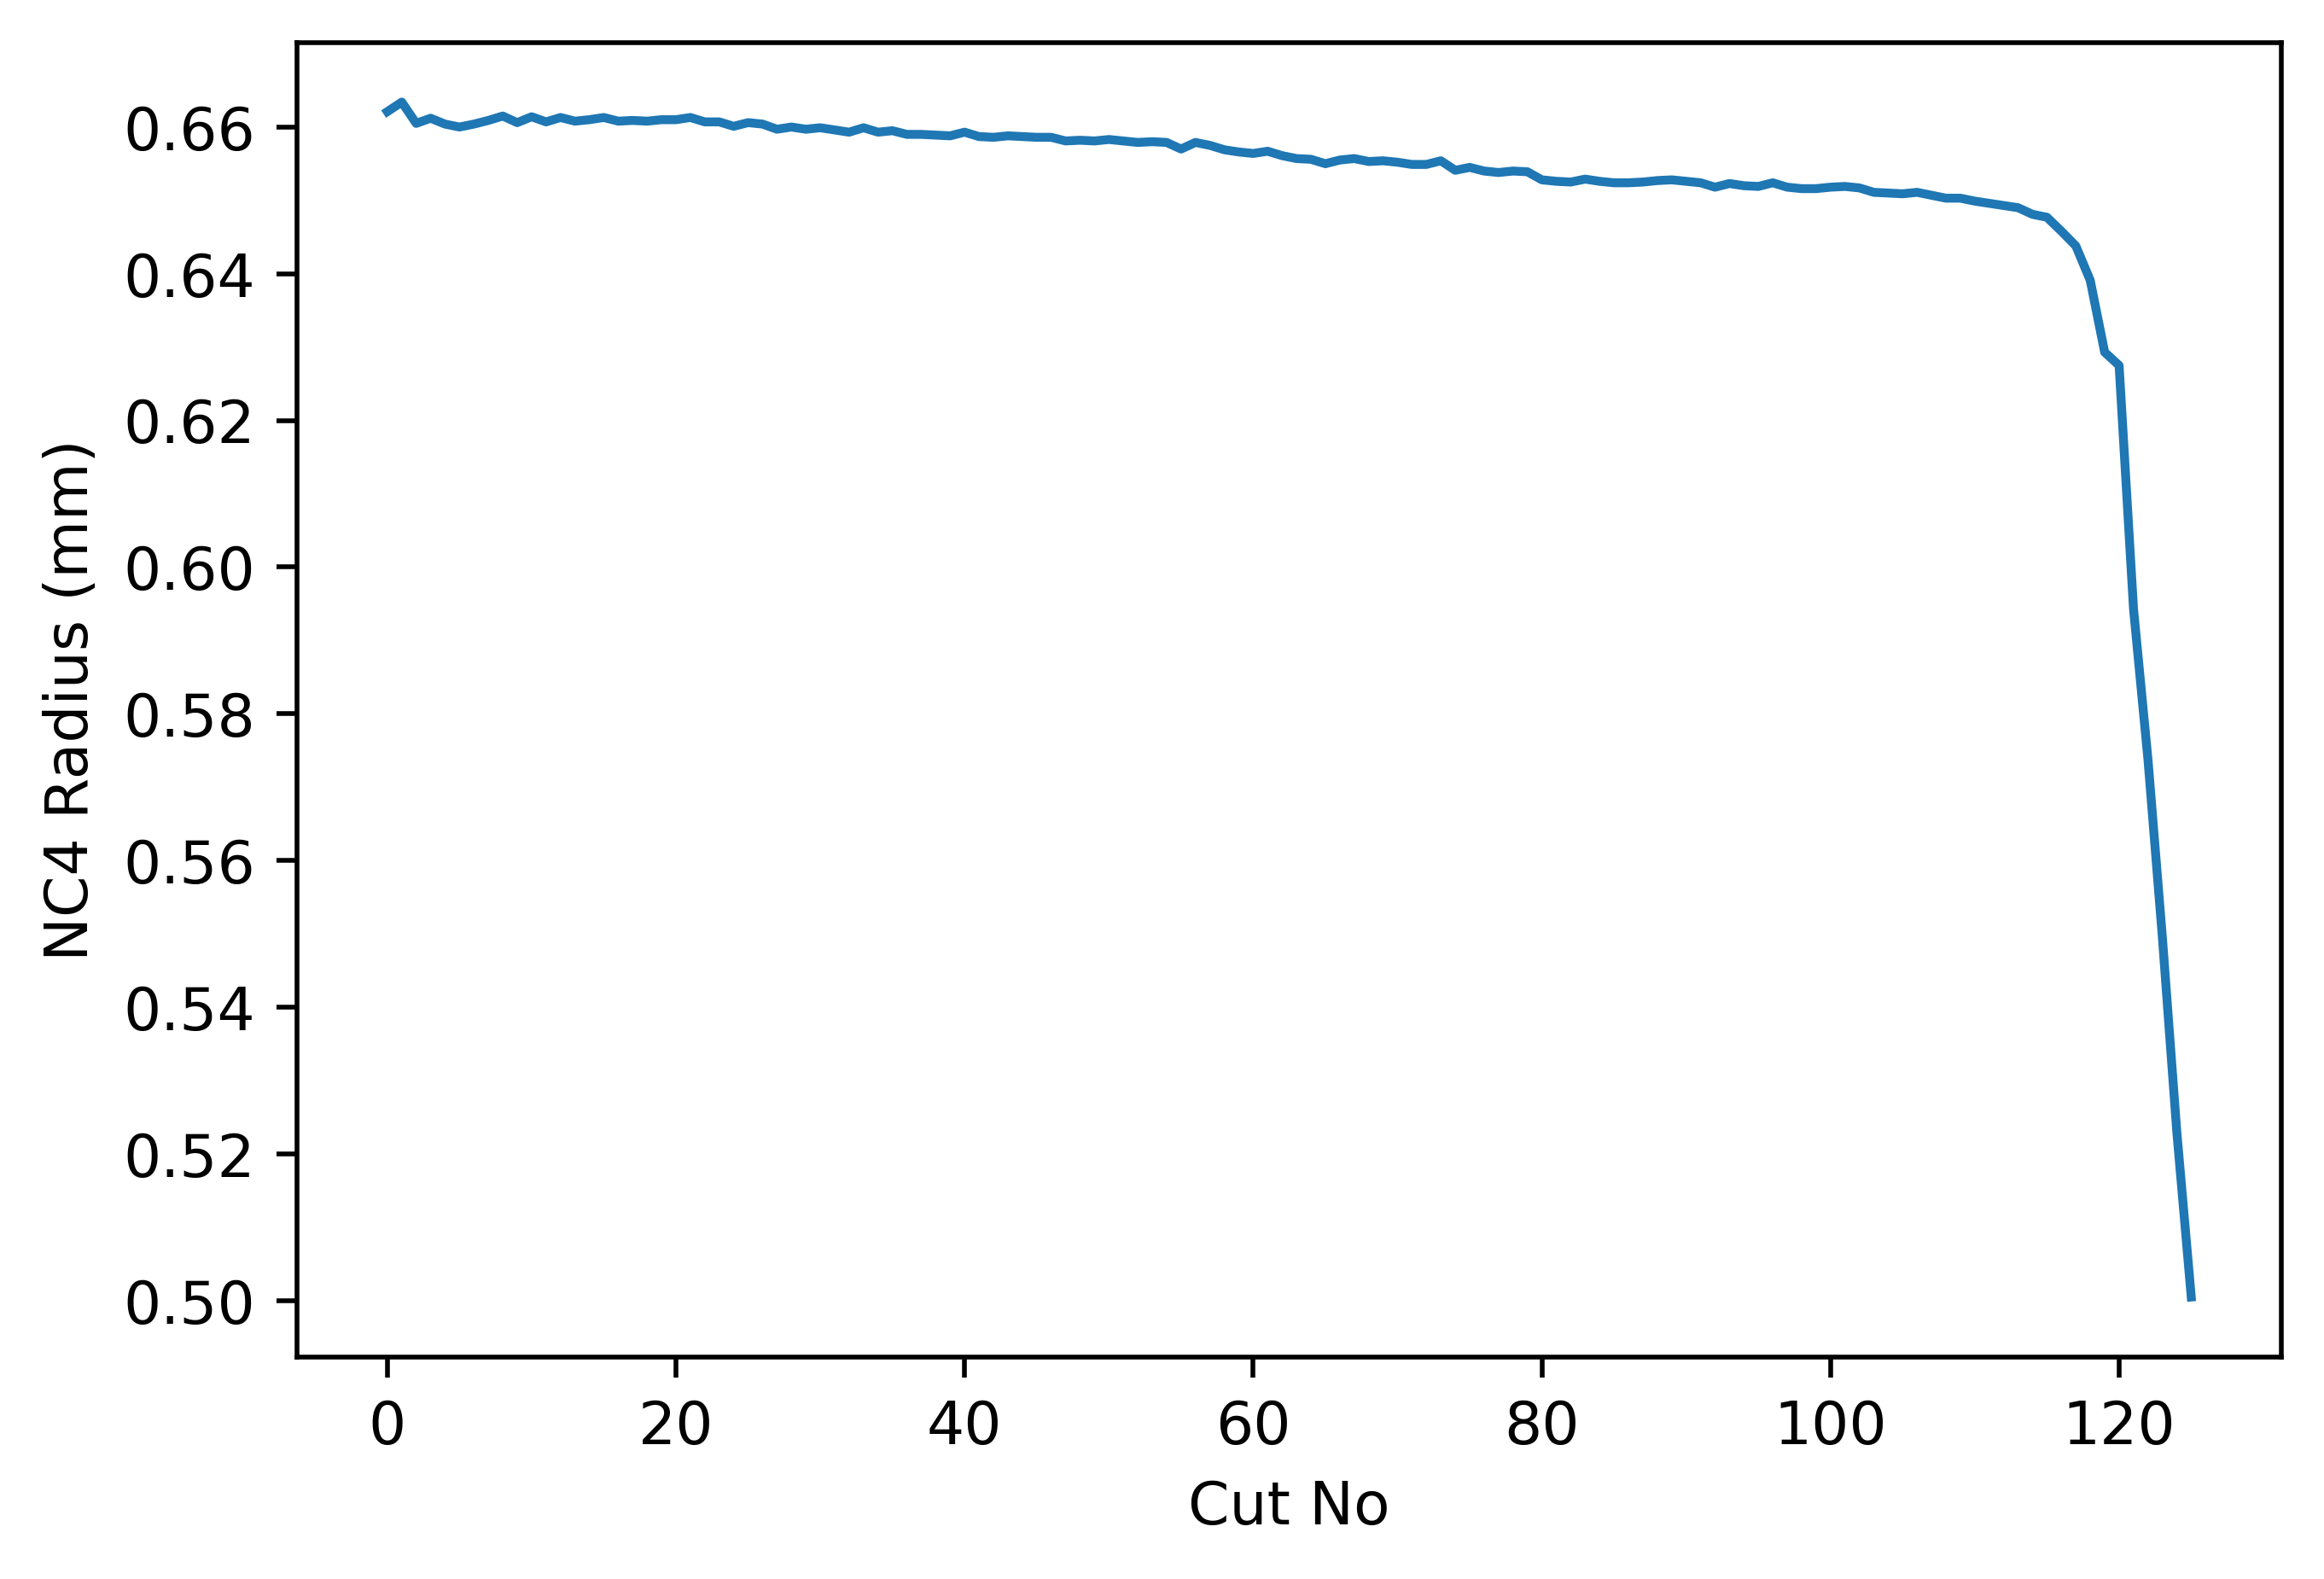

In [32]:
nc4radiusOutput(probe_data)

(<Figure size 6000x4000 with 3 Axes>,
 array([<AxesSubplot: ylabel='Radial DOC (mm)'>,
        <AxesSubplot: xlabel='Cut No', ylabel='Measured Radial DOC (mm)'>],
       dtype=object))

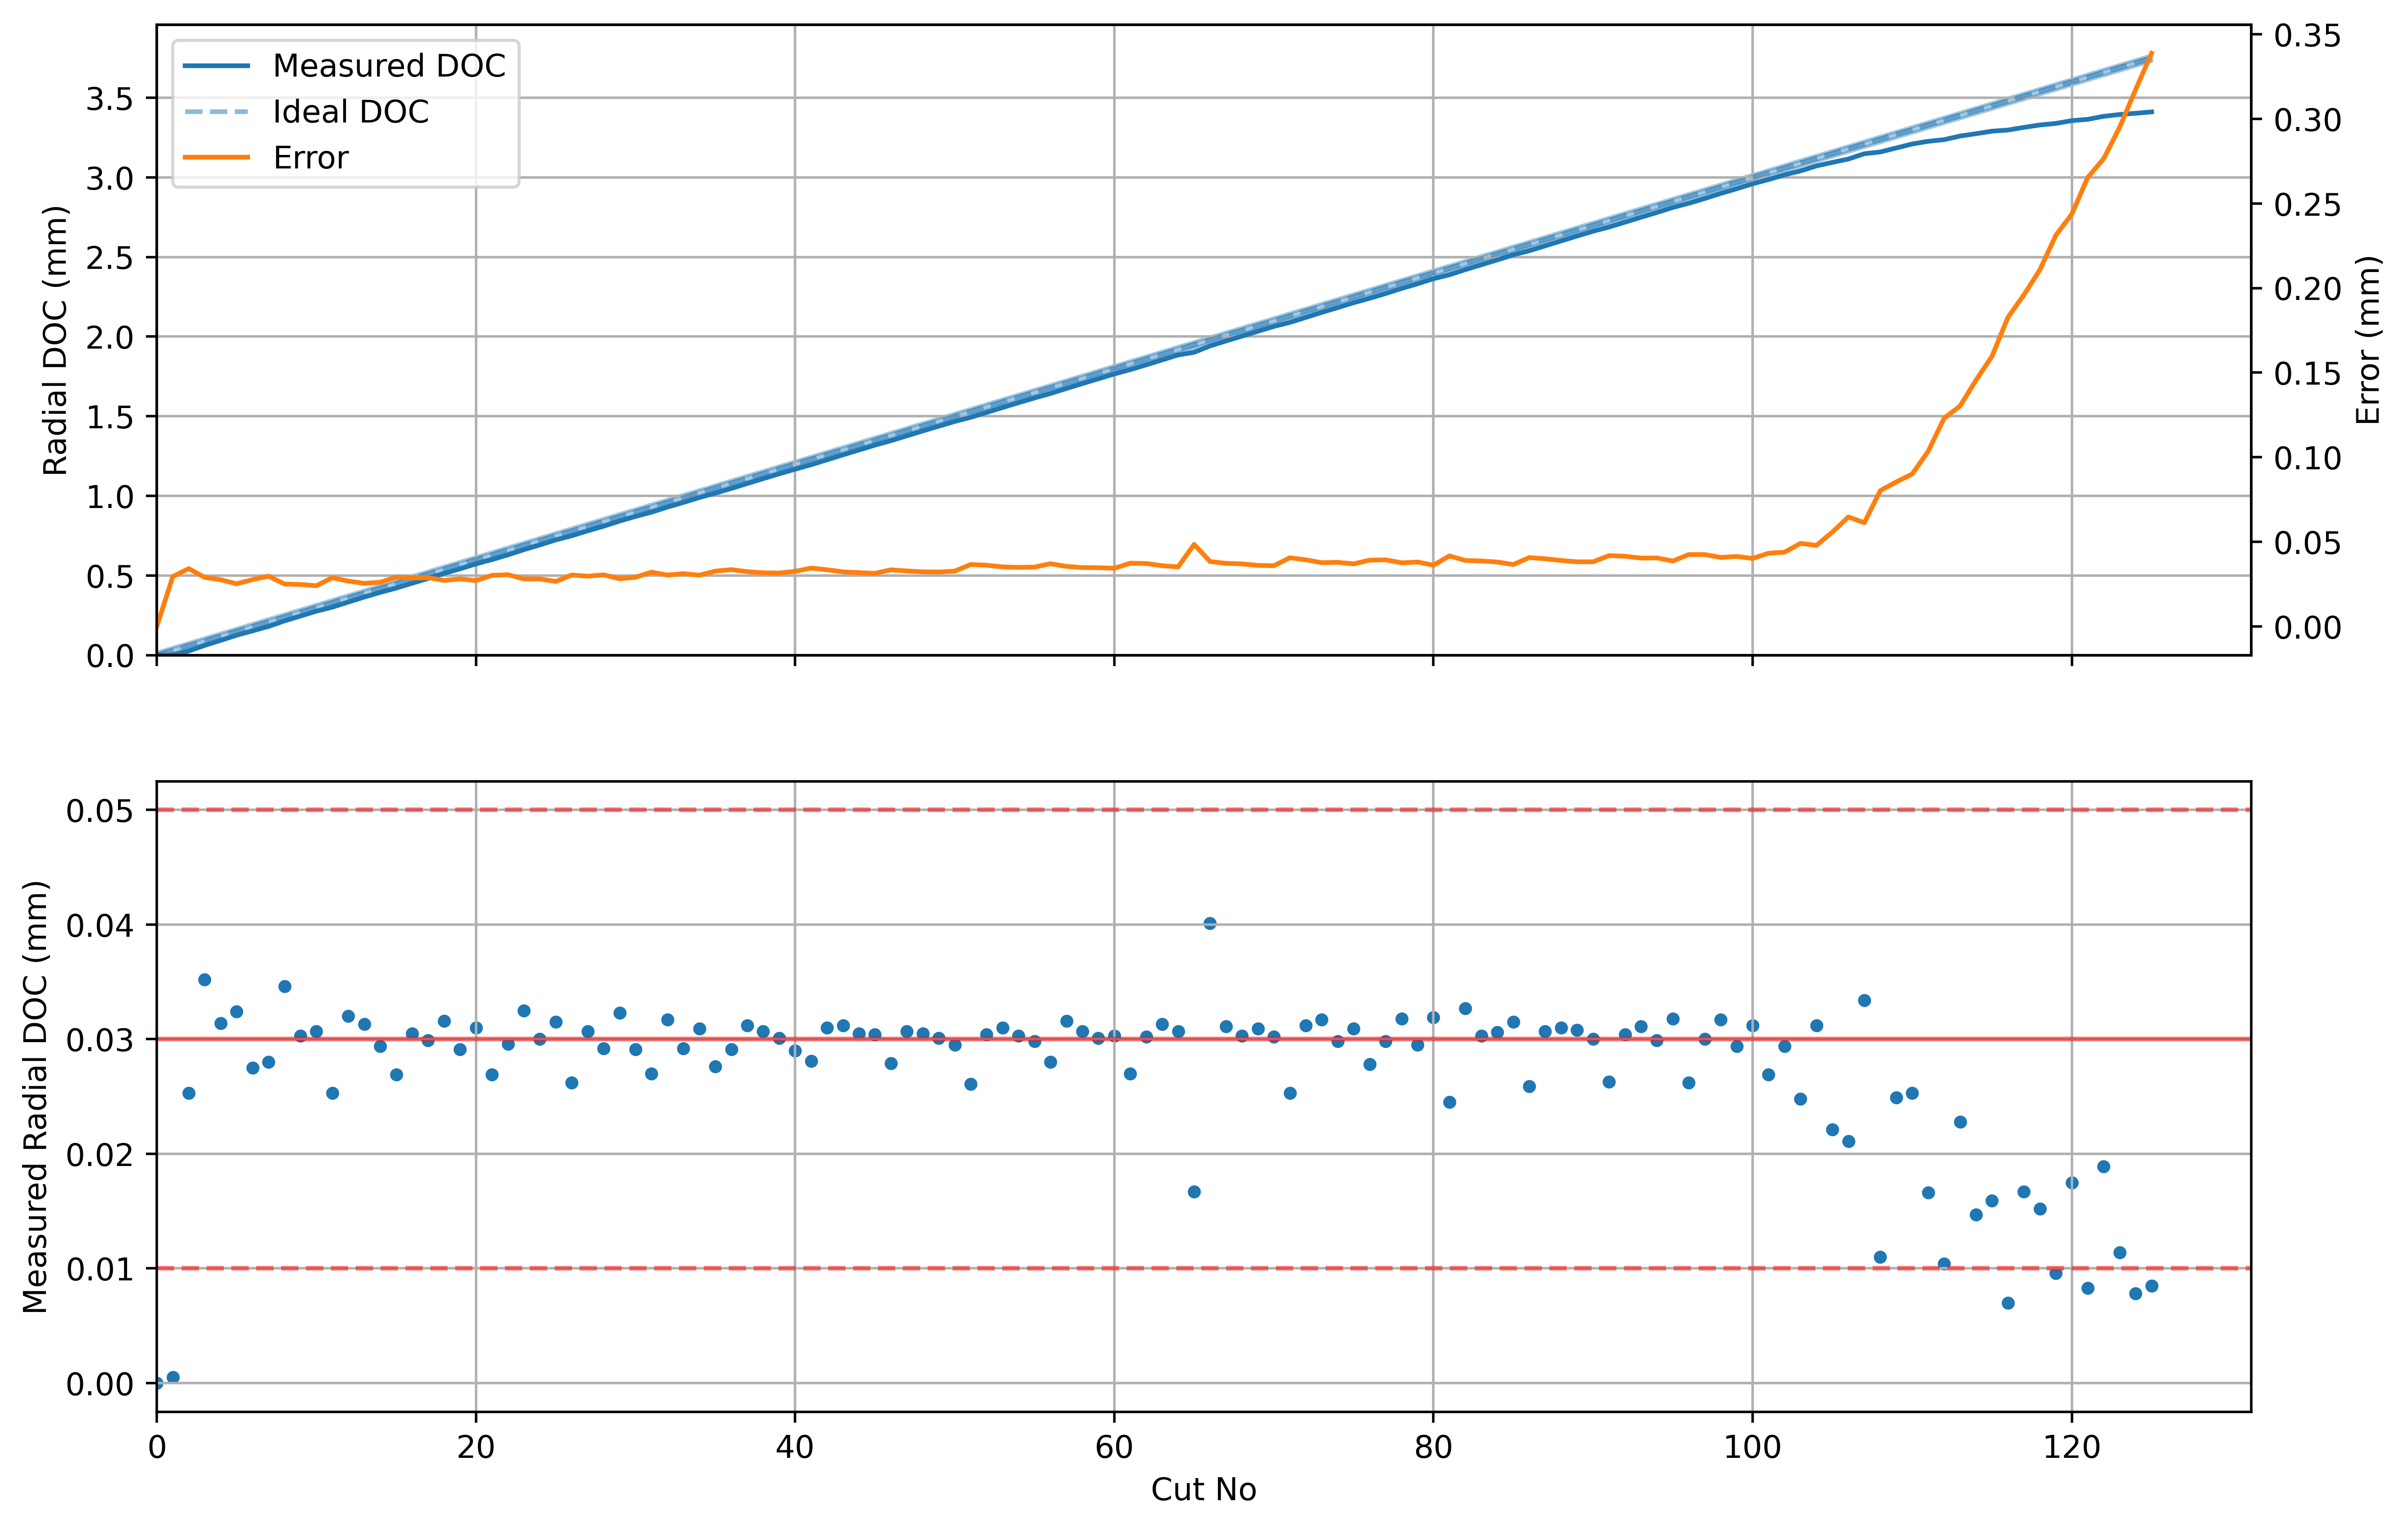

In [33]:
probeVisualise(probe_data)

REFBORE-S   REFBORE-X   REFBORE-Y
count  126.000000  126.000000  126.000000
mean    25.011875  -15.730159   -1.916667
std      0.000636    2.801522    0.645074
min     25.007200  -19.800000   -3.200000
25%     25.011500  -17.575000   -2.400000
50%     25.012000  -16.150000   -1.950000
75%     25.012275  -14.300000   -1.400000
max     25.012900    0.000000    0.000000

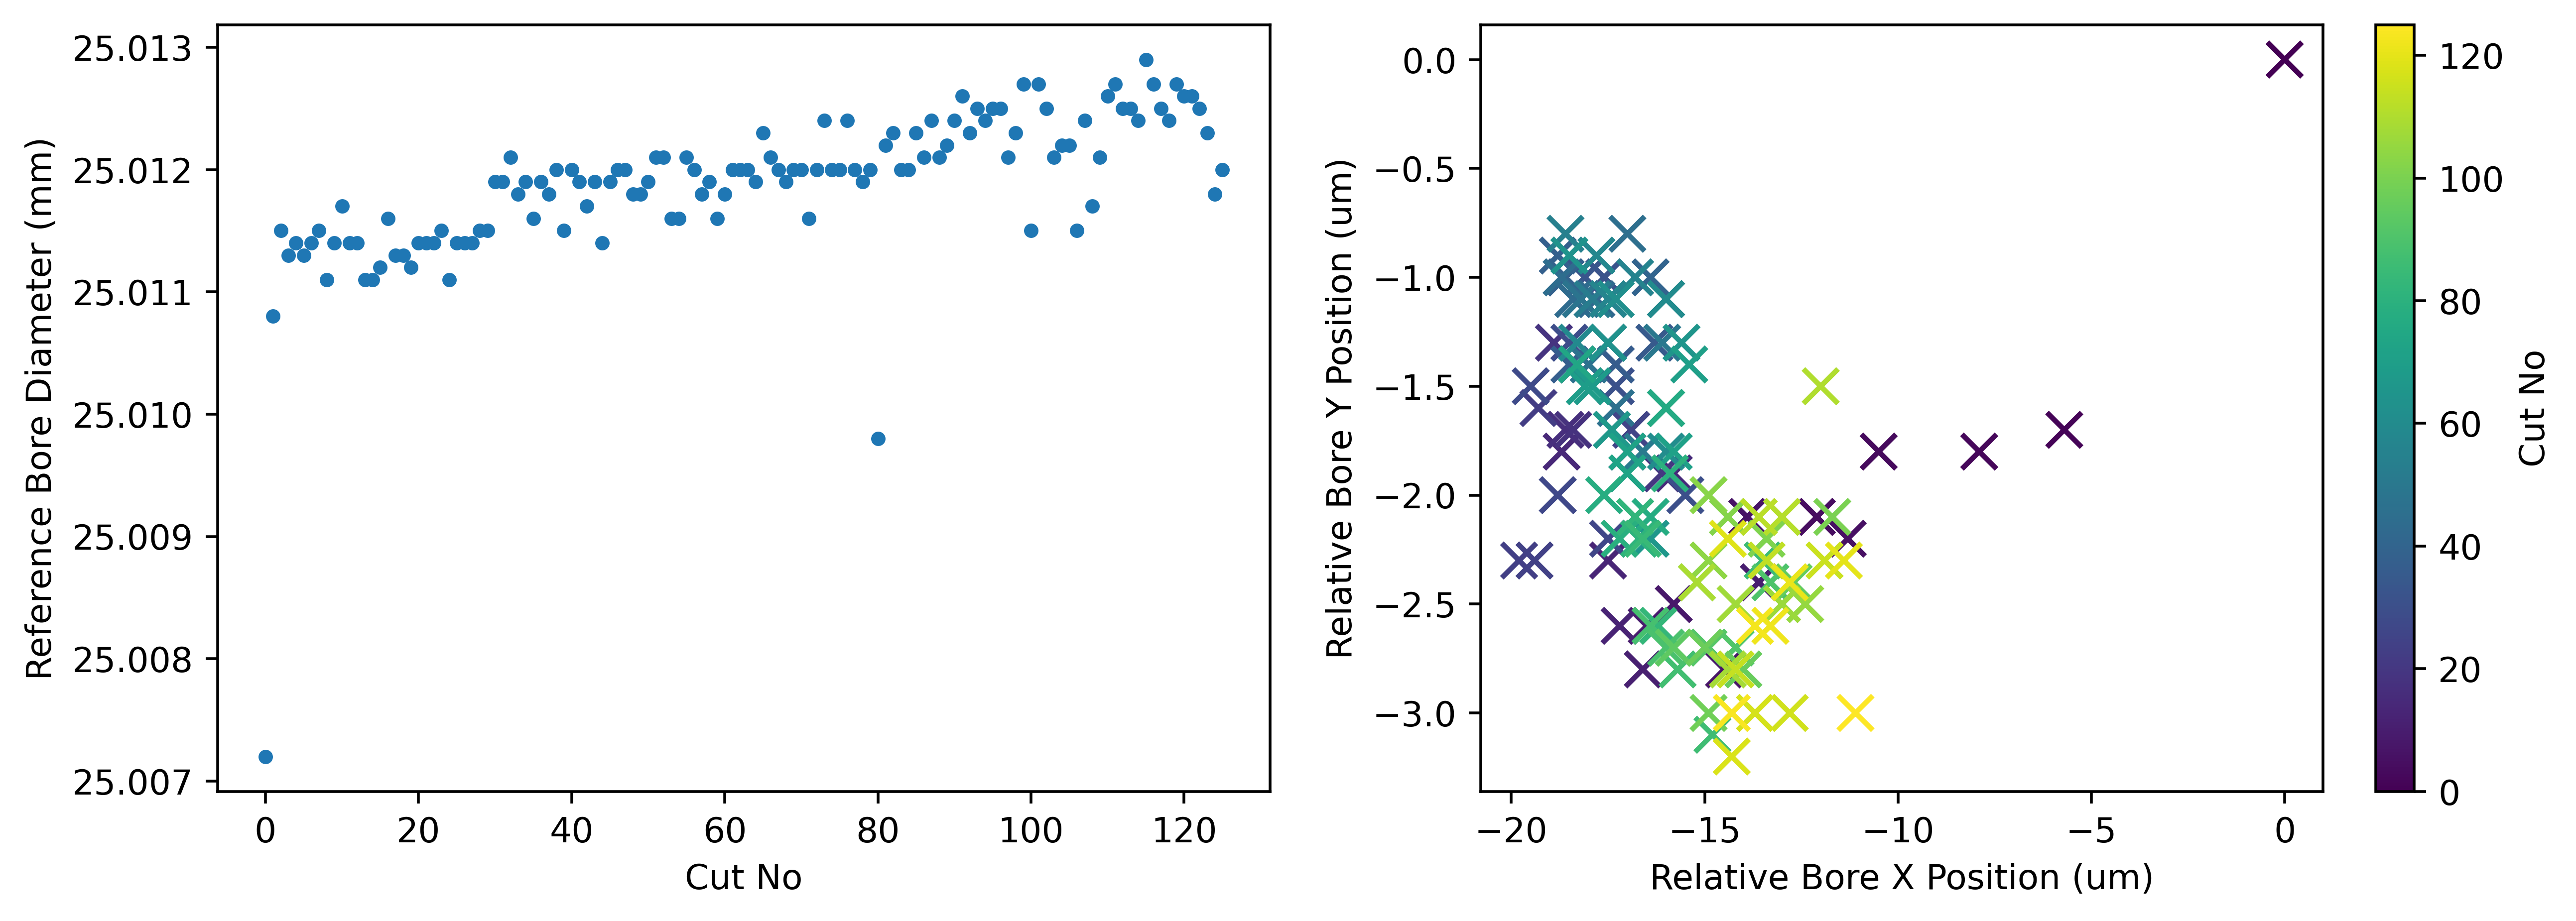

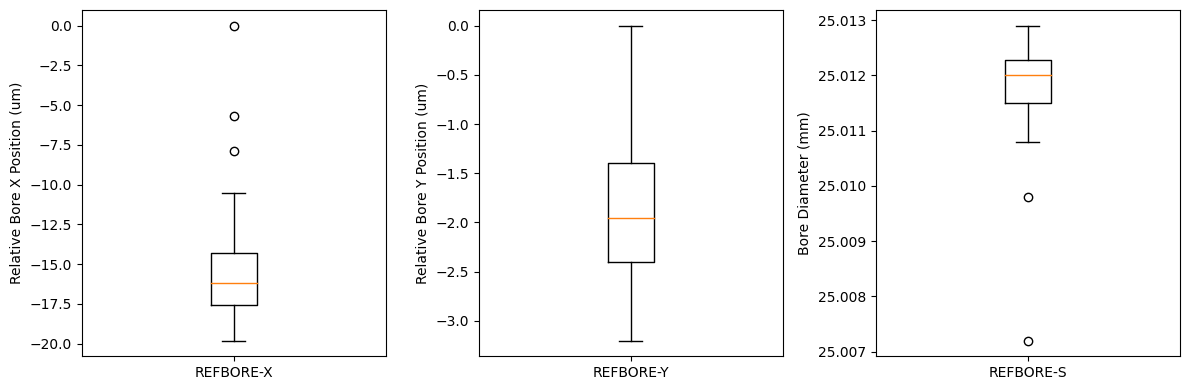

In [34]:
refbore_probe(probe_data)

## Test 15

In [35]:
filepath = Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_06_19_weartest_D1.3_#1000\240619-WEARTEST.csv'
print(filepath)
assert filepath.exists()

C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_06_19_weartest_D1.3_#1000\240619-WEARTEST.csv


In [36]:
probe_data = pd.read_csv(filepath, header=2)
probe_data['PROBEDIFF'] = probe_data['AVGPROBE'].diff()
probe_data['PROBEDIFF'] = probe_data['PROBEDIFF'].fillna(0)
probe_data['REFBORE-X'] = (probe_data['REFBORE-X'] - probe_data['REFBORE-X'].iloc[0]) * 1000
probe_data['REFBORE-Y'] = (probe_data['REFBORE-Y'] - probe_data['REFBORE-Y'].iloc[0]) * 1000
# probe_data['Cut No'] = probe_data['Cut No'] - 1
probe_data.set_index('Cut No', inplace=True)
probe_data['AVGPROBE'] = probe_data['AVGPROBE'] - probe_data['AVGPROBE'].iloc[0]
probe_data.head()

NC4 Radius   PROBE1   PROBE2   PROBE3   PROBE4  AVGPROBE  REFBORE-X  \
Cut No                                                                        
0.0         0.6673  12.0714  12.0706  12.0718  12.0713    0.0000        0.0   
1.0         0.6658  12.0712  12.0705  12.0718  12.0708   -0.0002       -1.9   
2.0         0.6601  12.0887  12.0886  12.0909  12.0892    0.0181       -4.2   
3.0         0.6591  12.1183  12.1188  12.1204  12.1172    0.0474       -5.9   
4.0         0.6590  12.1474  12.1460  12.1481  12.1449    0.0753       -7.2   

        REFBORE-Y  REFBORE-S  PROBEDIFF  
Cut No                                   
0.0           0.0    24.9961     0.0000  
1.0           0.9    24.9984    -0.0002  
2.0           0.6    24.9984     0.0183  
3.0           0.5    24.9985     0.0293  
4.0           1.2    24.9979     0.0279

In [37]:
probe_data.drop(index=[0, 1], inplace=True)

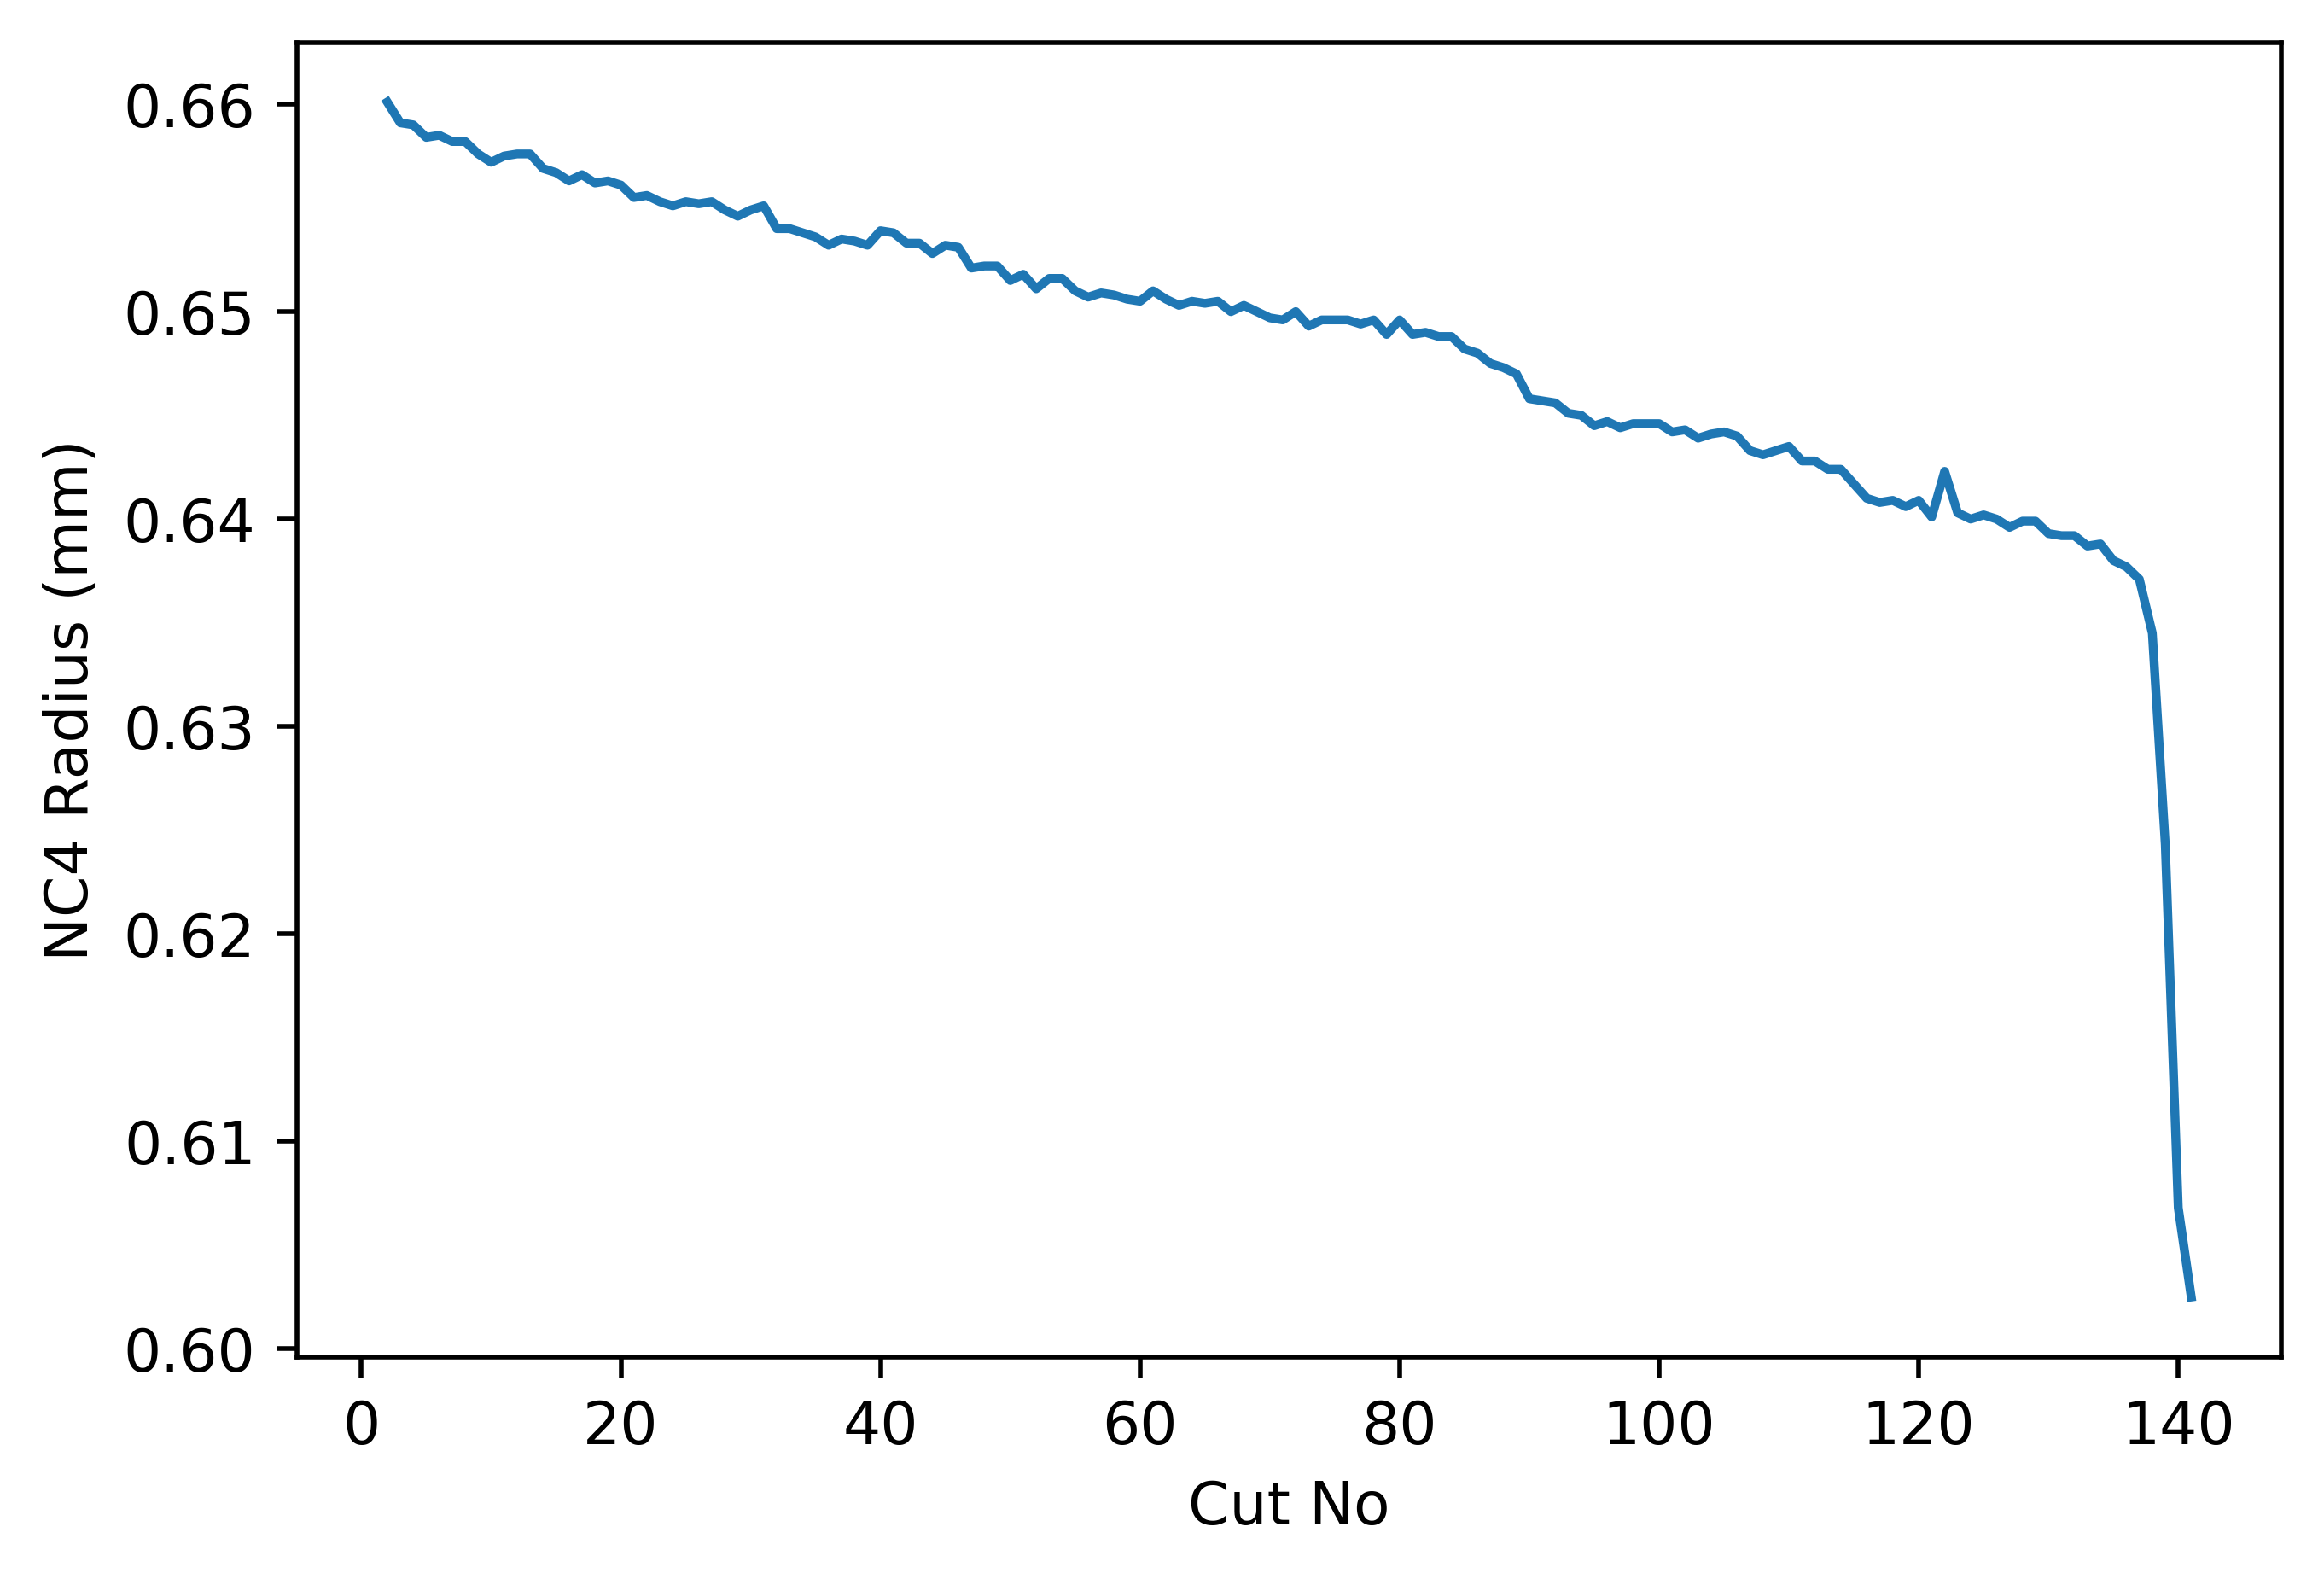

In [38]:
nc4radiusOutput(probe_data)

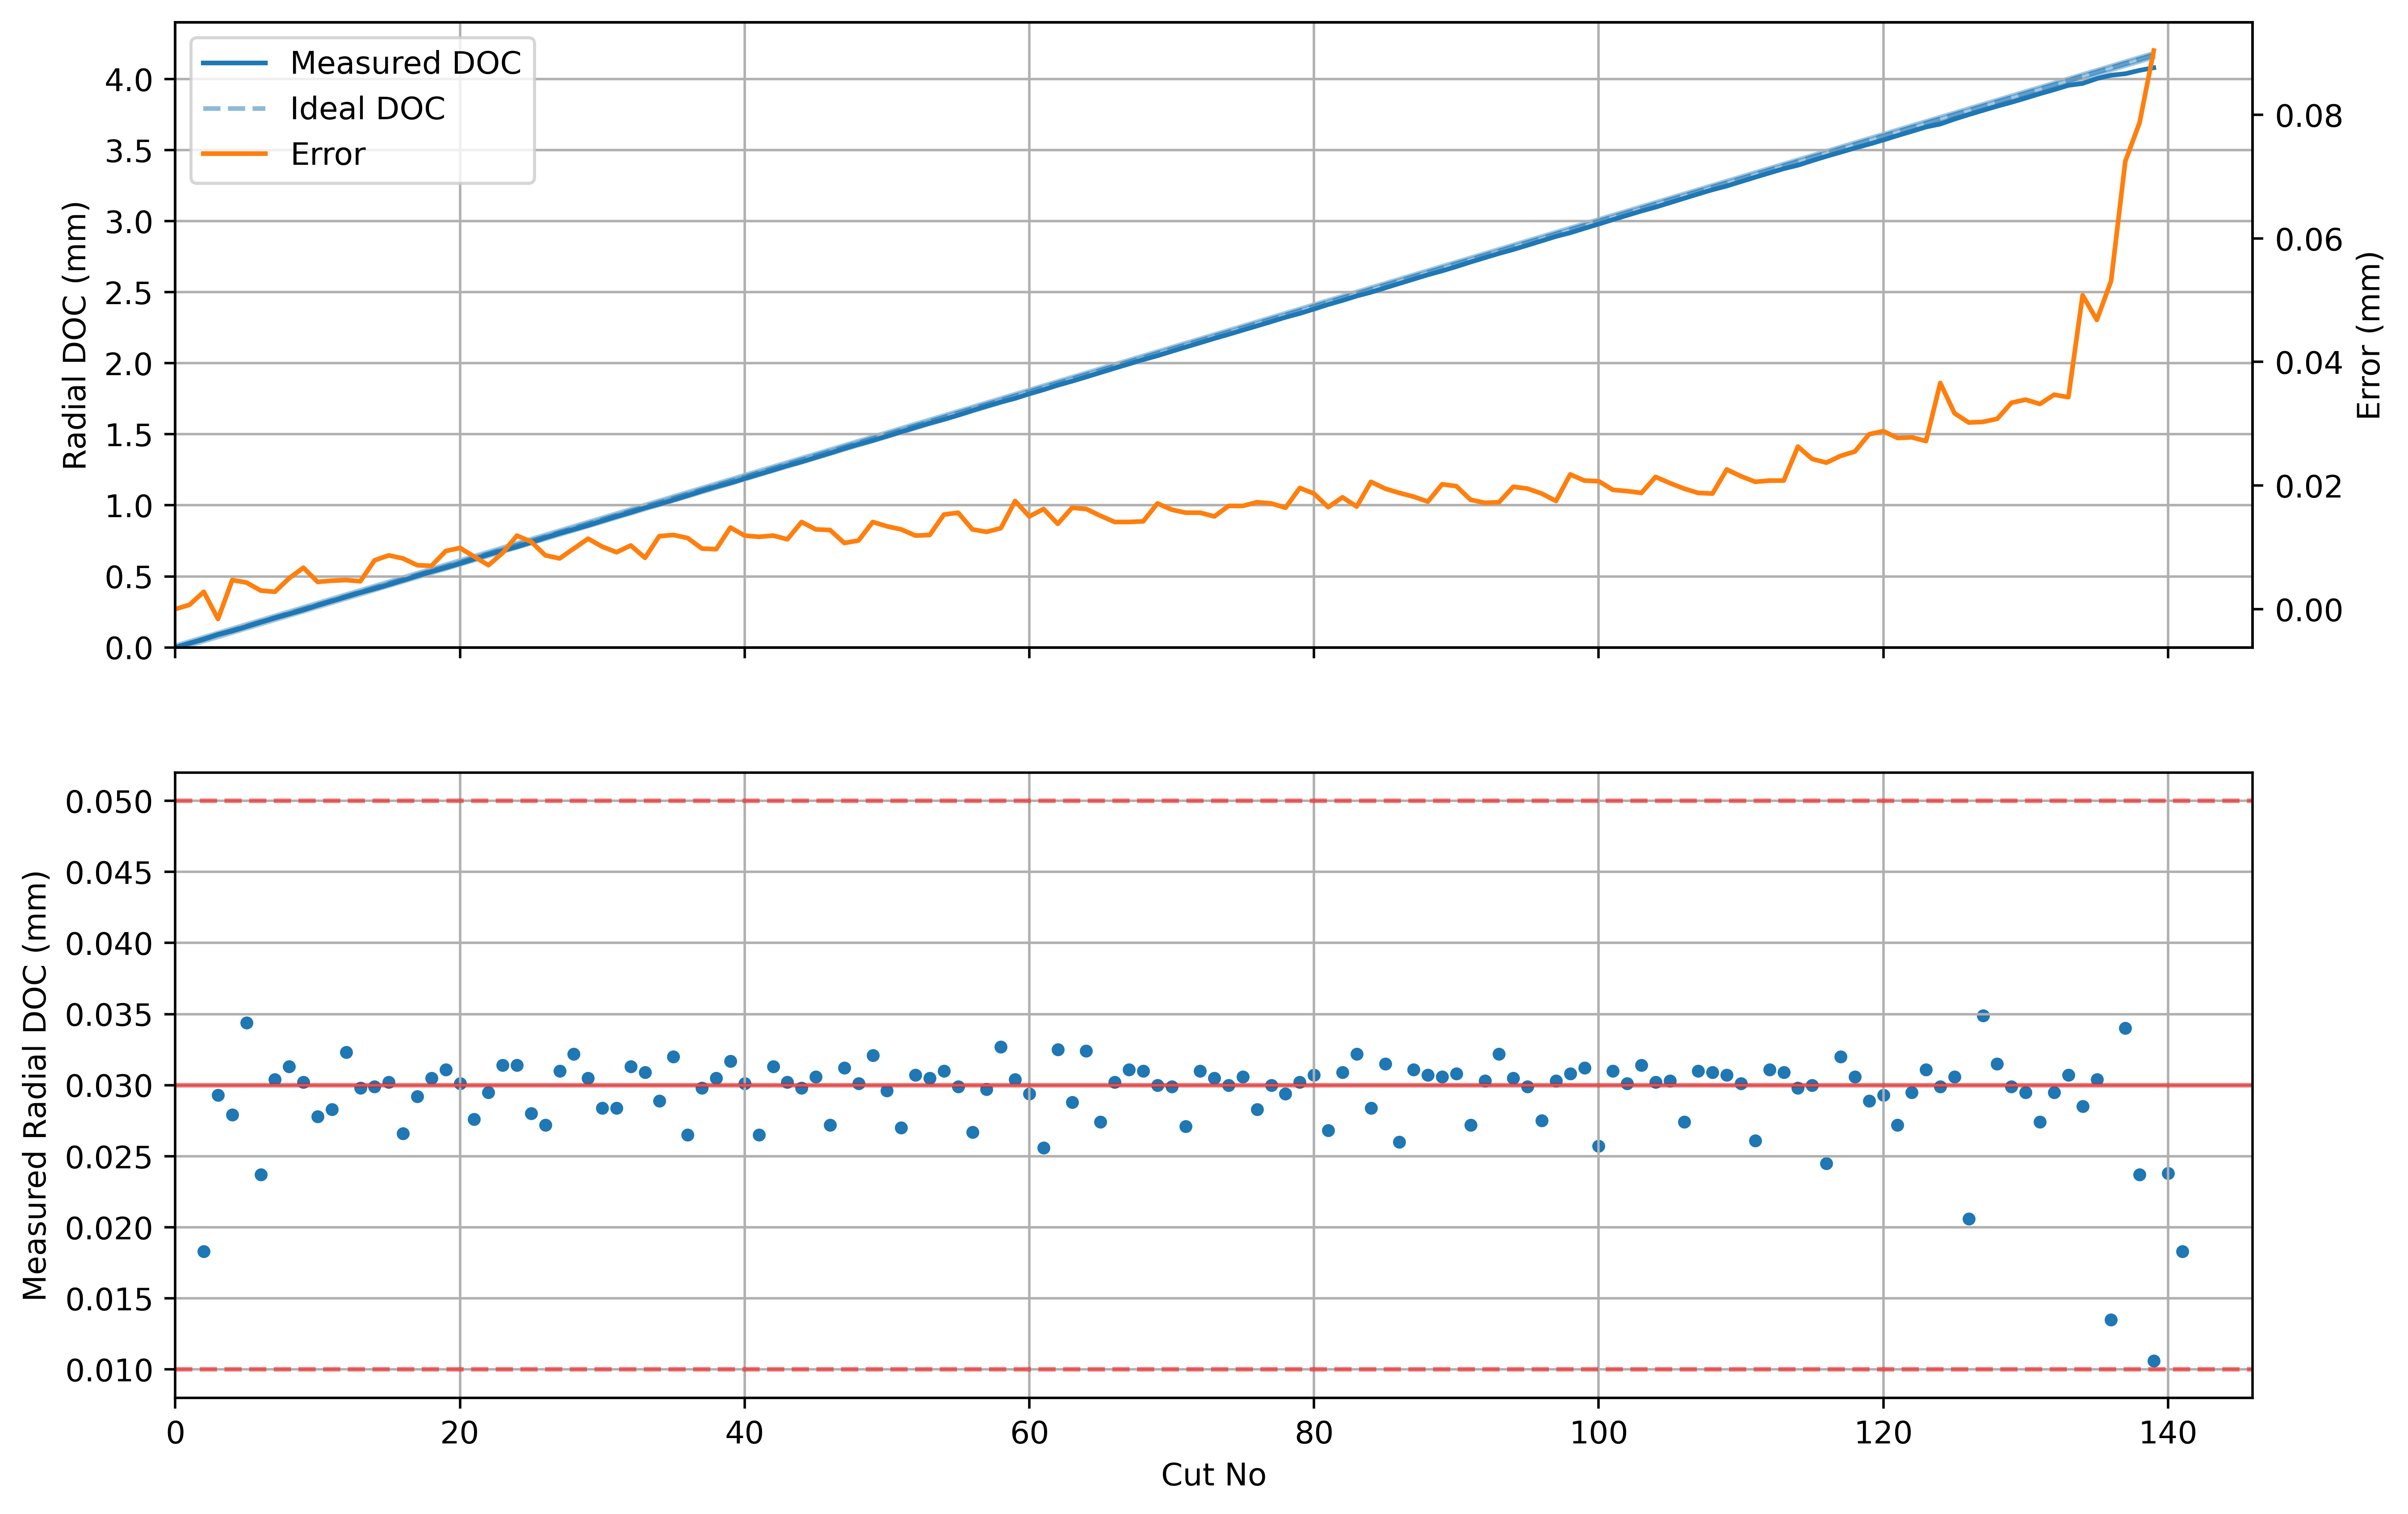

In [39]:
fig, ax = probeVisualise(probe_data)
# ax[0].set_xlim(100,)

REFBORE-S   REFBORE-X   REFBORE-Y
count  140.000000  140.000000  140.000000
mean    24.999239   -6.975714    3.752143
std      0.000679    1.975529    1.046781
min     24.997500   -9.900000    0.500000
25%     24.998600   -8.325000    2.900000
50%     24.999300   -7.450000    4.050000
75%     24.999800   -6.000000    4.600000
max     25.000500   -2.100000    5.300000

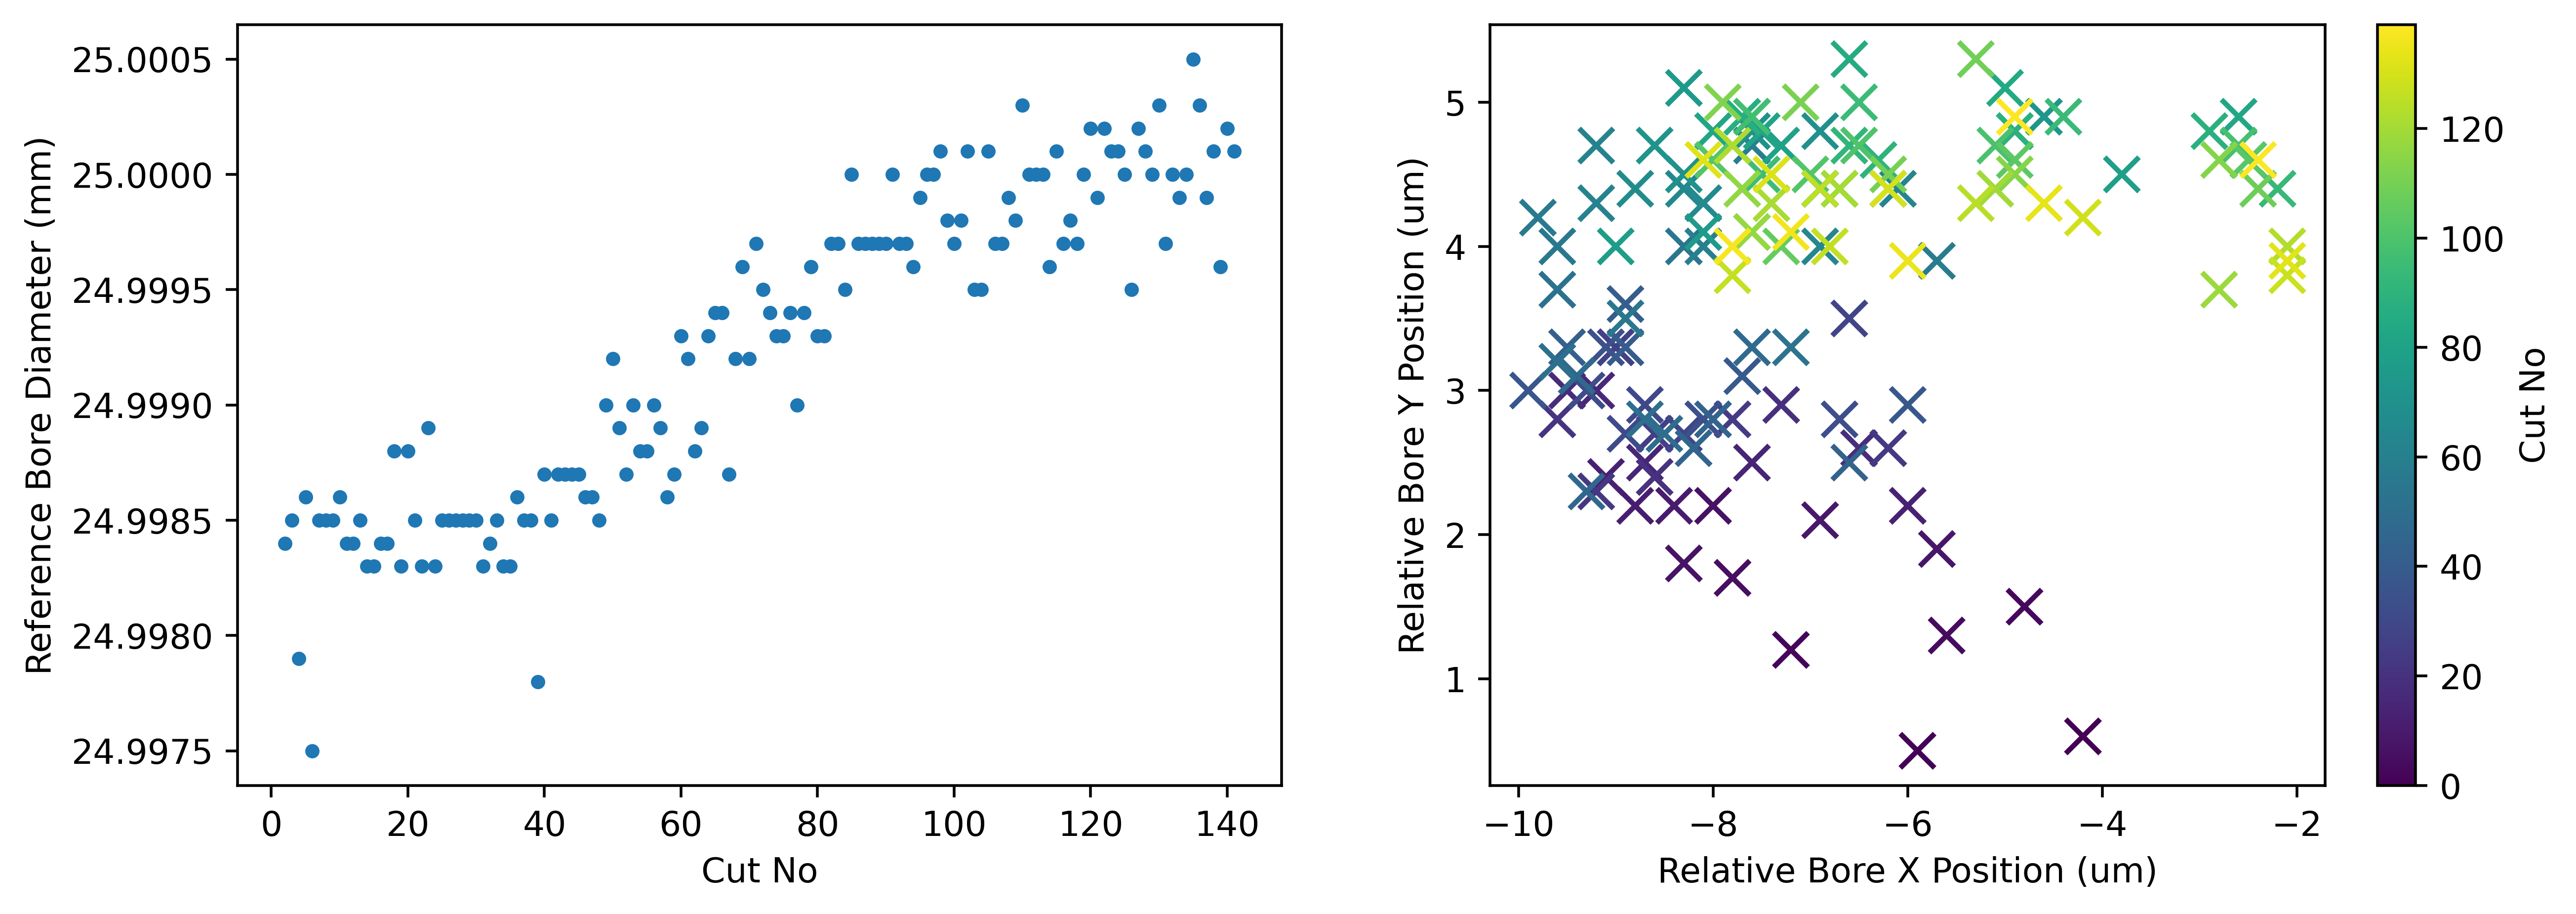

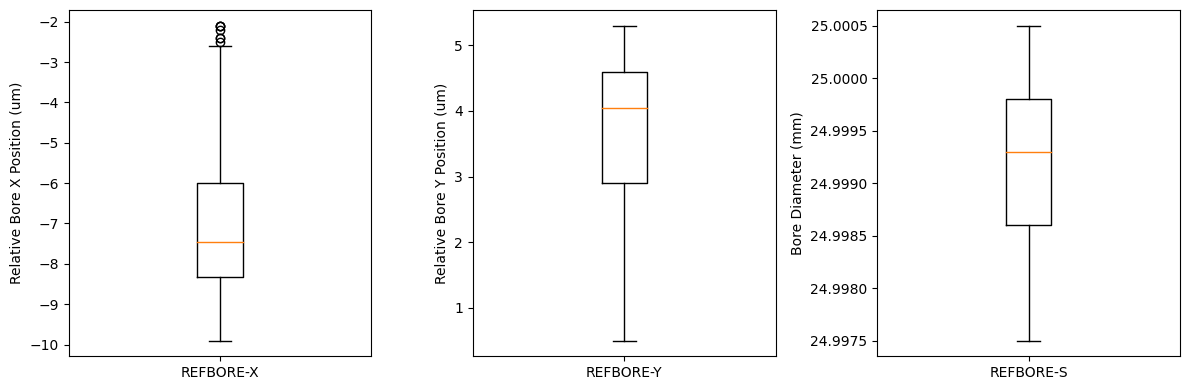

In [40]:
refbore_probe(probe_data)

## All Tests

In [5]:
base_path = Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing'
filepaths = [
    base_path / r'24_05_28_weartest_D1.3#1000\240528_WEARTEST.csv',
    base_path / r'24_06_10_weartest_D1.3_#1000\240610-WEARTEST.csv',
    base_path / r'24_06_19_weartest_D1.3_#1000\240619-WEARTEST.csv',
]
for p in filepaths:
    print(p)
    assert p.exists()

C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_05_28_weartest_D1.3#1000\240528_WEARTEST.csv
C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_06_10_weartest_D1.3_#1000\240610-WEARTEST.csv
C:\Users\tomje\OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_06_19_weartest_D1.3_#1000\240619-WEARTEST.csv


In [6]:
def read_probe_csv(filepath):
    p_data = pd.read_csv(filepath, header=2)
    p_data['PROBEDIFF'] = p_data['AVGPROBE'].diff()
    p_data['PROBEDIFF'] = p_data['PROBEDIFF'].fillna(0)
    p_data['REFBORE-X'] = (p_data['REFBORE-X'] - p_data['REFBORE-X'].iloc[0]) * 1000
    p_data['REFBORE-Y'] = (p_data['REFBORE-Y'] - p_data['REFBORE-Y'].iloc[0]) * 1000

    p_data.set_index('Cut No', inplace=True)
    p_data['AVGPROBE'] = p_data['AVGPROBE'] - p_data['AVGPROBE'].iloc[0]
    return p_data

In [40]:
probe_data = [read_probe_csv(p) for p in filepaths]
# probe_data[0].drop(index=[34, 35, 36, 37], inplace=True)
probe_data[0].drop(index=[0, 1], inplace=True)
probe_data[1].drop(index=[0, 1], inplace=True)
probe_data[2].drop(index=[0, 1], inplace=True)

In [41]:
def probe_cumulative(df, doc=0.03, tol=0.02, plt_ax=None):
    if plt_ax is None:
        fig, ax = plt.subplots()
    else:
        ax = plt_ax
        fig = ax.get_figure()

    y_measured = df['AVGPROBE'].values - df['AVGPROBE'].iloc[0]
    l1 = ax.plot(y_measured, label='Measured DOC',)

    x = np.arange(0, len(df))
    y_ideal = x * doc
    l2 = ax.plot(x, y_ideal, 'C0', linestyle='--', alpha=0.5, label='Ideal DOC')

    y_tol = (y_ideal + tol, y_ideal - tol)
    ax.fill_between(x, y_tol[0], y_tol[1], color='C0', alpha=0.4, label='Tolerance')

    ax.set_ylim(0,)
    ax.set_xlim(0,)
    ax.grid()

    ax2 = ax.twinx()
    l3 = ax2.plot(y_ideal - y_measured, label='Error', color='C1')

    ax.set_ylabel('Radial DOC (mm)')
    ax2.set_ylabel('Error (mm)')
    ax.set_xlabel('Cut No.')
    return fig, ax

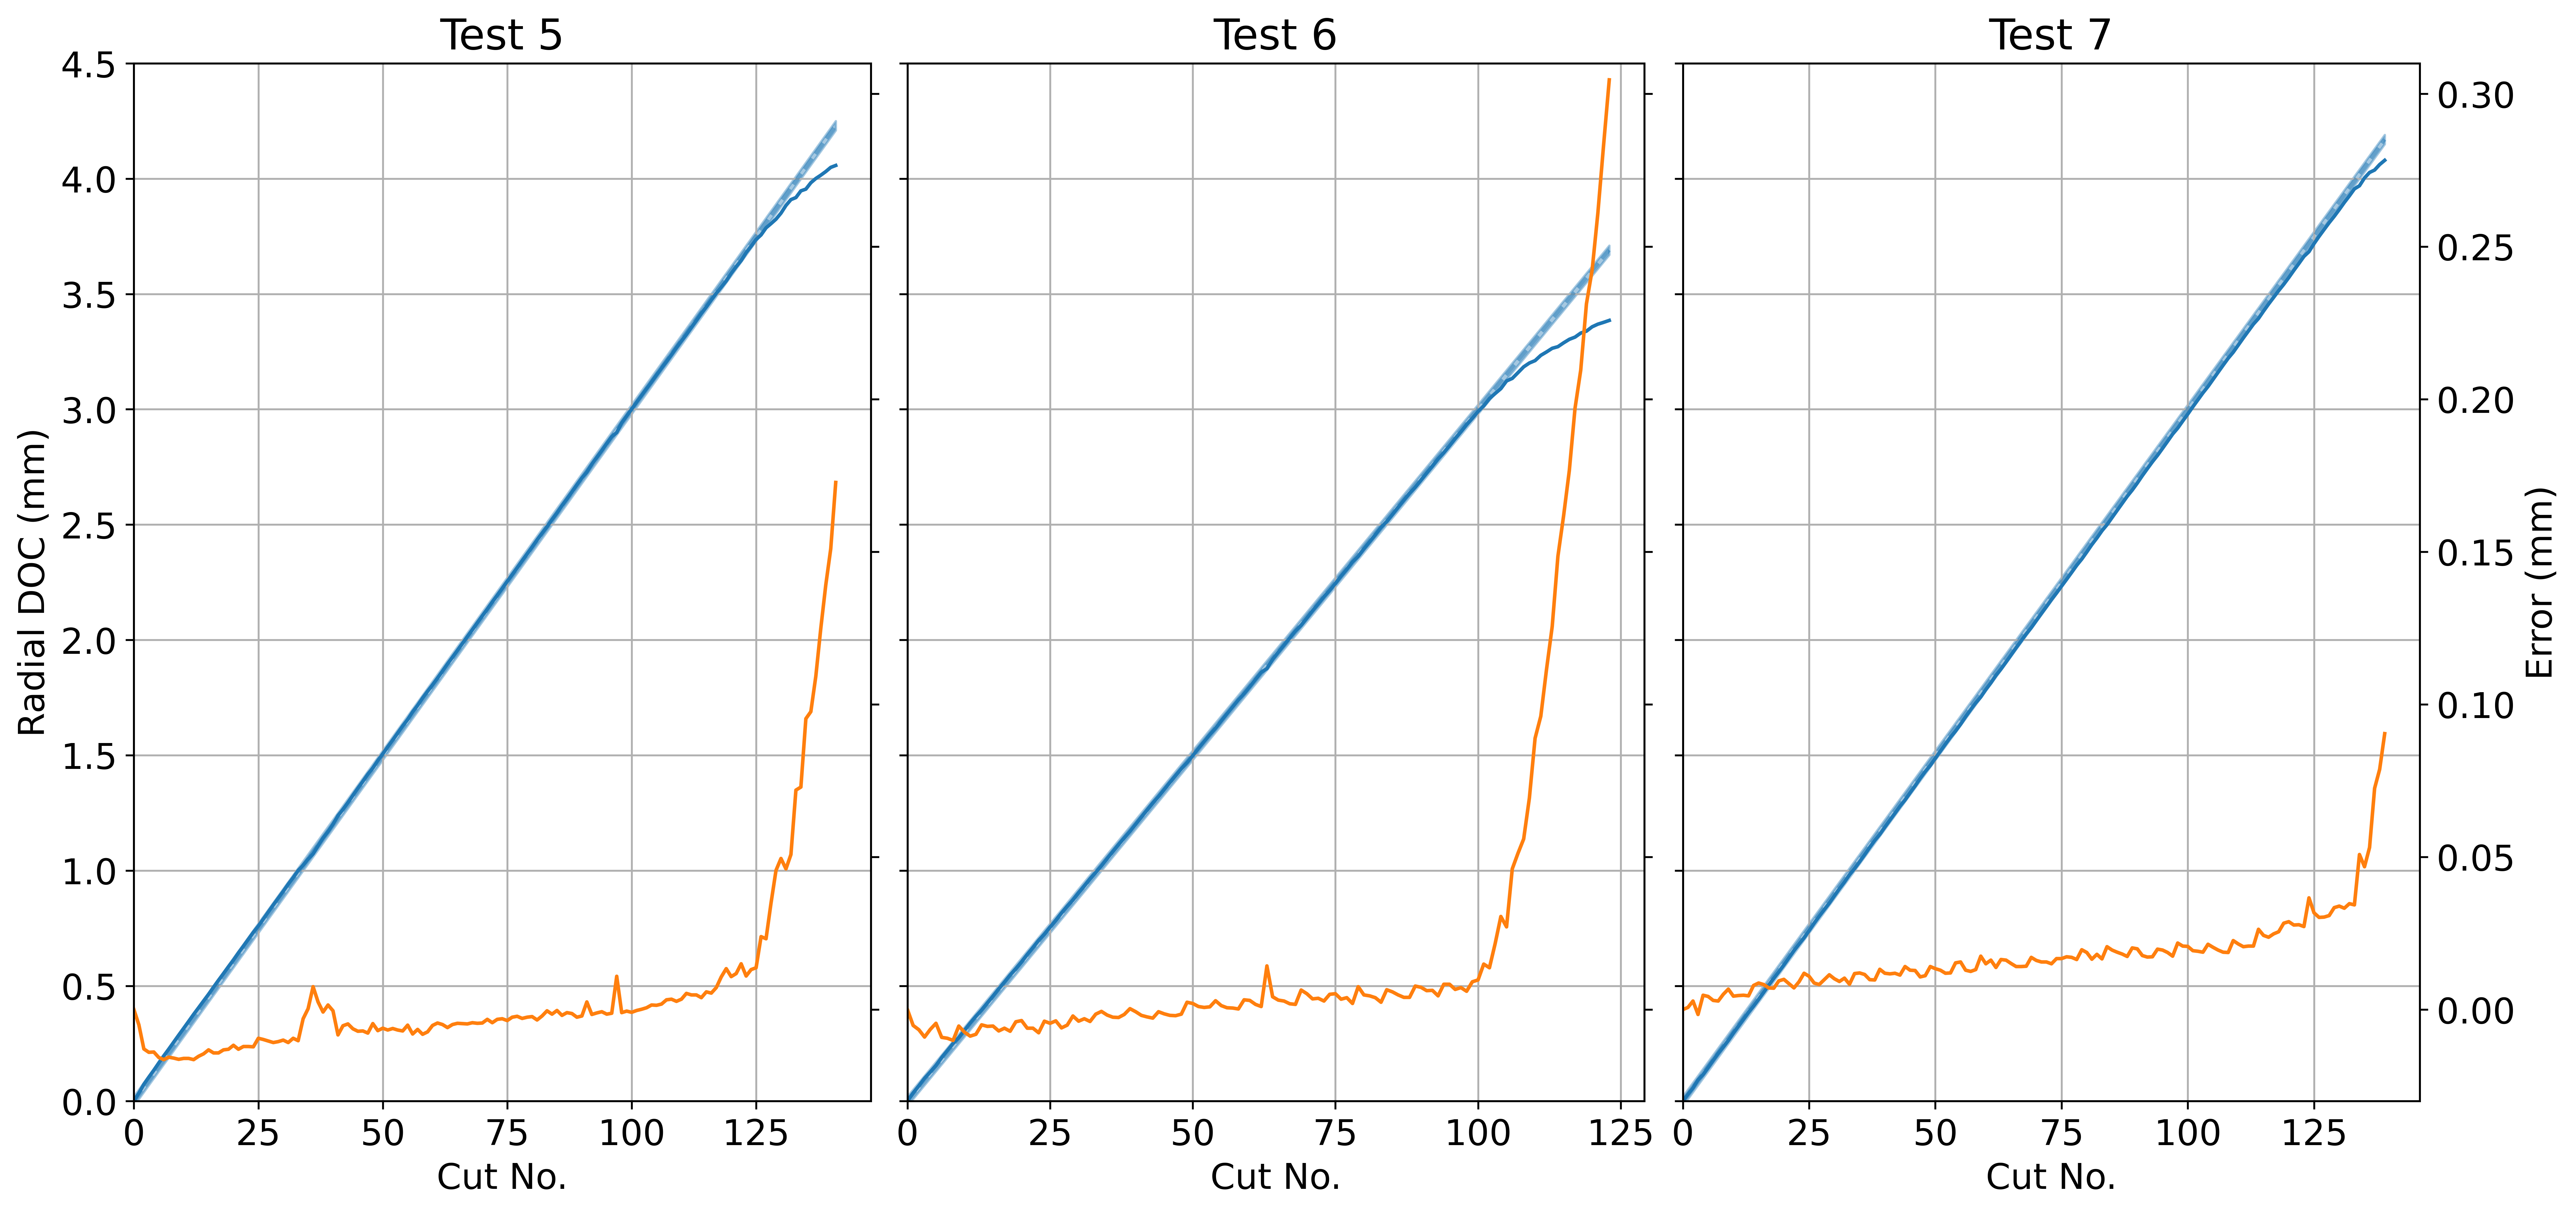

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 7), constrained_layout=True, dpi=600)
for i, p in enumerate(probe_data):
    _, ax[i] = probe_cumulative(p, plt_ax=ax[i])
    ax[i].set_title(f'Test {i+5}')
    ax[i].set_ylim(0, 4.5)
    a2 = ax[i].get_shared_x_axes().get_siblings(ax[i])[0]
    a2.set_ylim(-0.03, 0.31)

for a in ax:
    if a != ax[0]:
        a.set_ylabel('')
        a.set_yticklabels([])
    if a != ax[-1]:
        a2 = a.get_shared_x_axes().get_siblings(a)[0]
        a2.set_ylabel('')
        a2.set_yticklabels([])